In [2]:
import scanpy as sc
import scanpy.external as sce

import pandas as pd
import scipy
import anndata
from scanpy.external.pp import magic
import cytopus as cp


In [3]:
import seaborn as sns

In [4]:
from scrnaseq_preprocessing_utils import *
from SPECTRA_processing_utils import *

In [2]:
DATA_DIR = '~/path_to_data/'

# load data 

In [41]:
metadata_path = DATA_DIR+ 'GSE178429_PBMCs_stim_scRNAseq_cellMeta.txt.gz'
genes_path = DATA_DIR+'GSE178429_PBMCs_stim_scRNAseq_geneNames.txt.gz'
counts_path = DATA_DIR+ 'GSE178429_PBMCs_stim_scRNAseq_counts.txt.gz'
adata_save_path = DATA_DIR+ 'PBMC-X-NA-X-Kartha-X-scRNAseq-X-10.1016_j.xgen.2022.100166.h5ad'

In [28]:
#get obs
meta = pd.read_csv(metadata_path,sep='\t',index_col='cellBarcode')
meta

nCount_RNA  nFeature_RNA  \
cellBarcode                                                              
Control_1h_Donor1_tgcgagcgtgcattattgcct            17876          2916   
Control_1h_Donor1_cgatgcaggcaggctttggtc            14264          2842   
Control_1h_Donor1_cgacactagaccatccaagct            14086          2835   
Control_1h_Donor1_taccgaacctccttgagctaa            10941          2711   
Control_1h_Donor1_cacgccactggcataattcca            10675          2543   
...                                                  ...           ...   
PMAGolgiPlug_6h_Donor3_aaccacaacacgcgaaccaca         825           323   
PMAGolgiPlug_6h_Donor3_gtaatacaactcttacacgcg         818           205   
PMAGolgiPlug_6h_Donor3_ggcggaacgacactccaagct         775           367   
PMAGolgiPlug_6h_Donor3_acagtacaggacgtccaagct         766           364   
PMAGolgiPlug_6h_Donor3_cggtacgataggcaccaagct         757           368   

                                                    Condition StimType   Donor  
cellBarcode                                                                     
Control_1h_Donor1_tgcgagcgtgcattattgcct            Control_1h  Control  Donor1  
Control_1h_Donor1_cgatgcaggcaggctttggtc            Control_1h  Control  Donor1  
Control_1h_Donor1_cgacactagaccatccaagct            Control_1h  Control  Donor1  
Control_1h_Donor1_taccgaacctccttgagctaa            Control_1h  Control  Donor1  
Control_1h_Donor1_cacgccactggcataattcca            Control_1h  Control  Donor1  
...                                                       ...      ...     ...  
PMAGolgiPlug_6h_Donor3_aaccacaacacgcgaaccaca  PMAGolgiPlug_6h      PMA  Donor3  
PMAGolgiPlug_6h_Donor3_gtaatacaactcttacacgcg  PMAGolgiPlug_6h      PMA  Donor3  
PMAGolgiPlug_6h_Donor3_ggcggaacgacactccaagct  PMAGolgiPlug_6h      PMA  Donor3  
PMAGolgiPlug_6h_Donor3_acagtacaggacgtccaagct  PMAGolgiPlug_6h      PMA  Donor3  
PMAGolgiPlug_6h_Donor3_cggtacgataggcaccaagct  PMAGolgiPlug_6h      PMA  Donor3  

[23754 rows x 5 columns]

In [63]:
#gene gene names
genes = pd.read_csv(genes_path,header=None,index_col=0)
genes.index.names = ['gene_names']

In [31]:
#get count matrix
counts = scipy.io.mmread(counts_path).T
counts

<23754x19222 sparse matrix of type '<class 'numpy.int64'>'
	with 23245171 stored elements in COOrdinate format>

In [64]:
#construct adata
adata = anndata.AnnData(X=counts, obs=meta, var=genes, uns=None, obsm=None, varm=None, layers=None, raw=None, 
                dtype=None, shape=None, 
                filename=None, filemode=None, asview=False, 
                obsp=None, varp=None, oidx=None, vidx=None)

/scratch/lsftmp/14872887.tmpdir/ipykernel_484938/2508234592.py:2: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=counts, obs=meta, var=genes, uns=None, obsm=None, varm=None, layers=None, raw=None,


In [65]:
adata

AnnData object with n_obs × n_vars = 23754 × 19222
    obs: 'nCount_RNA', 'nFeature_RNA', 'Condition', 'StimType', 'Donor'

In [66]:
adata.X = scipy.sparse.csr_matrix(adata.X)

In [67]:
print(adata.X)

  (0, 11)	1.0
  (0, 26)	1.0
  (0, 36)	9.0
  (0, 46)	1.0
  (0, 54)	6.0
  (0, 58)	1.0
  (0, 61)	2.0
  (0, 67)	1.0
  (0, 83)	2.0
  (0, 87)	1.0
  (0, 89)	4.0
  (0, 102)	1.0
  (0, 103)	1.0
  (0, 107)	2.0
  (0, 108)	3.0
  (0, 112)	2.0
  (0, 113)	2.0
  (0, 118)	16.0
  (0, 125)	4.0
  (0, 130)	1.0
  (0, 137)	1.0
  (0, 167)	2.0
  (0, 168)	1.0
  (0, 173)	1.0
  (0, 178)	3.0
  :	:
  (23753, 17837)	7.0
  (23753, 18031)	1.0
  (23753, 18156)	1.0
  (23753, 18256)	1.0
  (23753, 18278)	1.0
  (23753, 18287)	1.0
  (23753, 18293)	2.0
  (23753, 18304)	7.0
  (23753, 18355)	1.0
  (23753, 18372)	1.0
  (23753, 18374)	1.0
  (23753, 18412)	9.0
  (23753, 18449)	1.0
  (23753, 18478)	1.0
  (23753, 18552)	2.0
  (23753, 18580)	1.0
  (23753, 18613)	1.0
  (23753, 18735)	2.0
  (23753, 18778)	1.0
  (23753, 18862)	1.0
  (23753, 18951)	4.0
  (23753, 19025)	4.0
  (23753, 19167)	2.0
  (23753, 19168)	3.0
  (23753, 19185)	1.0


In [68]:
#save raw
adata.raw = adata

In [69]:
#rename index of adata.var
adata.var.index.names = ['genes']
adata.var_names = adata.var_names.astype(str)

In [70]:
adata

AnnData object with n_obs × n_vars = 23754 × 19222
    obs: 'nCount_RNA', 'nFeature_RNA', 'Condition', 'StimType', 'Donor'

In [ ]:
#write
adata.write(adata_save_path)
print('saved to',adata_save_path)

In [73]:
adata.var.index

Index(['WASH7P', 'LOC729737', 'LOC100133331', 'MIR6723', 'LOC100288069',
       'FAM87B', 'LINC00115', 'LINC01128', 'FAM41C', 'LOC100130417',
       ...
       'NLGN4Y-AS1', 'TTTY14', 'CD24', 'BCORP1', 'TXLNGY', 'KDM5D', 'TTTY10',
       'EIF1AY', 'RPS4Y2', 'PRORY'],
      dtype='object', name='genes', length=19222)

# cluster adata

In [31]:
adata_path = DATA_DIR+ 'PBMC-X-NA-X-Kartha-X-scRNAseq-X-10.1016_j.xgen.2022.100166.h5ad'
adata_save_path = DATA_DIR+ 'PBMC-X-NA-X-Kartha-X-scRNAseq-X-10.1016_j.xgen.2022.100166_normalized_clustered.h5ad'
pheno_names = ['pheno_k10', 'pheno_k20', 'pheno_k30', 'pheno_k40', 'pheno_k50', 'pheno_k60',
              'pheno_k70','pheno_k80','pheno_k90','pheno_k100']
pheno_k = [10,20,30,40,50,60,70,80,90,100]

In [12]:
adata = sc.read(adata_path)
adata

Only considering the two last: ['.100166', '.h5ad'].
Only considering the two last: ['.100166', '.h5ad'].


AnnData object with n_obs × n_vars = 23754 × 19222
    obs: 'nCount_RNA', 'nFeature_RNA', 'Condition', 'StimType', 'Donor'

In [13]:
if isinstance(adata.X, scipy.sparse.csr_matrix) != True:
    adata.X = scipy.sparse.csr_matrix(adata.X)
adata.X

<23754x19222 sparse matrix of type '<class 'numpy.float32'>'
	with 23245171 stored elements in Compressed Sparse Row format>

In [15]:
#total count normalization
sc.pp.normalize_total(adata, target_sum=None)
#logarithmize +1 the data
sc.pp.log1p(adata)

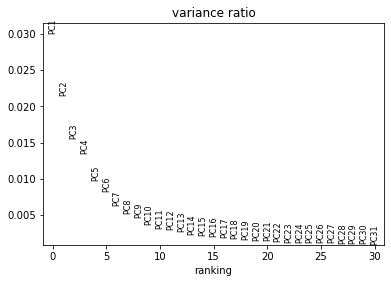

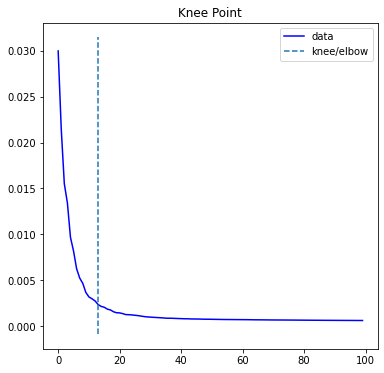

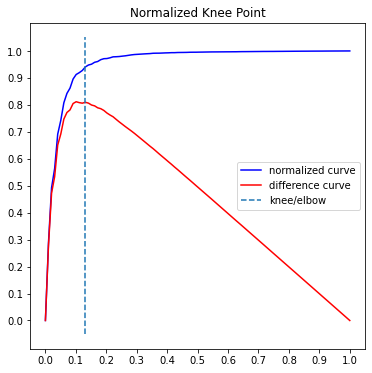

Kneepoint happens at PC: 13
13 PC explain 12.6985335489735 % of variance
2 PC explain 5.147372558712959 % of variance
3 PC explain 6.698525790125132 % of variance
4 PC explain 8.04110486060381 % of variance
5 PC explain 9.008653089404106 % of variance
6 PC explain 9.826306160539389 % of variance
7 PC explain 10.45148428529501 % of variance
8 PC explain 10.97534908913076 % of variance
9 PC explain 11.44145024009049 % of variance
10 PC explain 11.808596341870725 % of variance
11 PC explain 12.12640106678009 % of variance
12 PC explain 12.424356513656676 % of variance
13 PC explain 12.6985335489735 % of variance
14 PC explain 12.933434173464775 % of variance
15 PC explain 13.147839531302452 % of variance
16 PC explain 13.353201816789806 % of variance
17 PC explain 13.538007333409041 % of variance
18 PC explain 13.714261073619127 % of variance
19 PC explain 13.870567514095455 % of variance
20 PC explain 14.016242721118033 % of variance
21 PC explain 14.160067692864686 % of variance
22 PC e

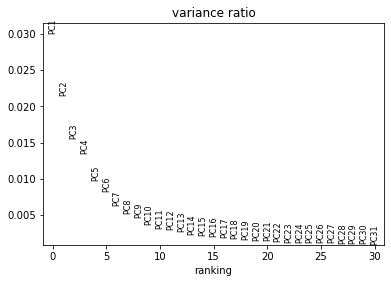

In [16]:
#select optimal number of PCs and recalculate PCs
number_of_PC_used = calculate_optimal_PC(adata, min_PC = 50, min_var=25, n_comps=100, use_hv=None)

In [17]:
#recalc umap
sc.pp.neighbors(adata, n_neighbors=10, method= 'umap', n_pcs=number_of_PC_used,random_state=0)
sc.tl.umap(adata,random_state=0)

In [18]:
#recalc tsne
sc.tl.tsne(adata, random_state = 7, n_pcs=number_of_PC_used)

/home/wallet/miniconda3/envs/2022_Peer_SPADE_cellrank2/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [34]:
for j,k in enumerate(pheno_names):
        result_pheno_ndf_all = sce.tl.phenograph(adata.obsm['X_pca'], k = pheno_k[j],seed=1)
        adata.obs[k] = pd.Categorical(result_pheno_ndf_all[0])

Finding 10 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 14.597735166549683 seconds
Jaccard graph constructed in 4.871699333190918 seconds
Wrote graph to binary file in 0.09161591529846191 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.945809
After 2 runs, maximum modularity is Q = 0.946814
Louvain completed 22 runs in 4.538524866104126 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 27.681097507476807 seconds
Finding 20 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 13.259414672851562 seconds
Jaccard graph constructed in 5.45200514793396 seconds
Wrote graph to binary file in 0.22144246101379395 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.934547
Louvain completed 21 runs in 5.159887790679932 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 27.615865230560303 seconds
Fi

In [21]:
#recalculate magic
a = magic(adata, copy=True, verbose=True, solver= 'exact', n_pca=adata.obsm['X_pca'].shape[1], knn=5, t=3)
adata.layers['imputed'] = a.X

Calculating MAGIC...
  Running MAGIC on 23754 cells and 19222 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 13.31 seconds.
    Calculating KNN search...
    Calculated KNN search in 63.82 seconds.
    Calculating affinities...
    Calculated affinities in 63.92 seconds.
  Calculated graph and diffusion operator in 141.08 seconds.
  Running MAGIC with `solver='exact'` on 19222-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 29.25 seconds.


/home/wallet/.local/lib/python3.10/site-packages/magic/utils.py:145: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  data = anndata.AnnData(data)


Calculated MAGIC in 171.56 seconds.


In [ ]:
adata.write(adata_save_path)
print('saved to:',adata_save_path)

# highly variable genes

In [125]:
adata_path = DATA_DIR + 'PBMC-X-NA-X-Kartha-X-scRNAseq-X-10.1016_j.xgen.2022.100166_normalized_clustered.h5ad'
#adata_save_path = DATA_DIR + 'PBMC-X-NA-X-Kartha-X-scRNAseq-X-10.1016_j.xgen.2022.100166_normalized_clustered_10000hv_batch.h5ad'
adata_save_path = DATA_DIR + 'PBMC-X-NA-X-Kartha-X-scRNAseq-X-10.1016_j.xgen.2022.100166_normalized_clustered_7500hv_batch.h5ad'
#adata_save_path = DATA_DIR + 'PBMC-X-NA-X-Kartha-X-scRNAseq-X-10.1016_j.xgen.2022.100166_normalized_clustered_5000hv_batch.h5ad'

pheno_names = ['pheno_var_k10', 'pheno_var_k20', 'pheno_var_k30', 'pheno_var_k40', 'pheno_var_k50', 'pheno_var_k60',
              'pheno_var_k70','pheno_var_k80','pheno_var_k90','pheno_var_k100']
pheno_k = [10,20,30,40,50,60,70,80,90,100]

number_of_hv_genes = 7500#5000#10000
exclude_batch_specific_hv = True
batch_key_tumors = 'Donor'

add_marker_genes = True
marker_gene_path = DATA_DIR + 'immune_marker_panel_clean_210216.csv'
#marker_gene_sets = ['M_important_marker','DC_important_marker']

In [126]:
adata = sc.read(adata_path)
adata

Only considering the two last: ['.100166_normalized_clustered', '.h5ad'].
Only considering the two last: ['.100166_normalized_clustered', '.h5ad'].


AnnData object with n_obs × n_vars = 23754 × 19222
    obs: 'nCount_RNA', 'nFeature_RNA', 'Condition', 'StimType', 'Donor', 'pheno_k10', 'pheno_k20', 'pheno_k30', 'pheno_k40', 'pheno_k50', 'pheno_k60', 'pheno_k70', 'pheno_k80', 'pheno_k90', 'pheno_k100'
    uns: 'log1p', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'imputed'
    obsp: 'connectivities', 'distances'

In [127]:
adata.layers['raw'] = np.array(adata.raw[adata.obs_names, adata.var_names].X.todense())
adata.layers['raw']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [128]:
if exclude_batch_specific_hv ==True:
    sc.pp.highly_variable_genes(adata, layer='raw', flavor='seurat_v3', n_top_genes=number_of_hv_genes, batch_key=batch_key_tumors)
else:
    sc.pp.highly_variable_genes(adata, layer='raw', flavor='seurat_v3', n_top_genes=number_of_hv_genes)

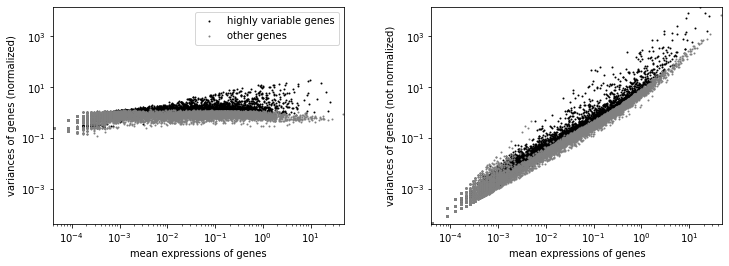

In [129]:
sc.pl.highly_variable_genes(adata, log=True, show=None, save=None, highly_variable_genes=True)

In [130]:
adata

AnnData object with n_obs × n_vars = 23754 × 19222
    obs: 'nCount_RNA', 'nFeature_RNA', 'Condition', 'StimType', 'Donor', 'pheno_k10', 'pheno_k20', 'pheno_k30', 'pheno_k40', 'pheno_k50', 'pheno_k60', 'pheno_k70', 'pheno_k80', 'pheno_k90', 'pheno_k100'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'log1p', 'neighbors', 'pca', 'tsne', 'umap', 'hvg'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'imputed', 'raw'
    obsp: 'connectivities', 'distances'

# add marker genes to hv

In [131]:
if add_marker_genes ==True:
    marker_genes_df = pd.read_csv(marker_gene_path, encoding='latin-1')

In [132]:
#limit to human only
marker_genes_df = marker_genes_df[marker_genes_df['species'] == 'homo_sapiens']

In [133]:
#limit to markers used for distinguishing immune from tumor cells
marker_genes_df = marker_genes_df[marker_genes_df['immune_typing_important_marker'] == True]

In [134]:
#extract gene names
marker_genes = list(set(marker_genes_df['gene_name']))

In [135]:
marker_genes

['CD3D',
 'TGFB2',
 'IL6R',
 'TREX1',
 'CXCR1',
 'XCL1',
 'IFNL3',
 'CCR2',
 'MYC',
 'IL13RA1',
 'KLRC2',
 'CCR1',
 'PPBP',
 'CXCR2',
 'CXCL1',
 'CD22',
 'CD96',
 'IL17RA',
 'IL21',
 'IL3',
 'MAFB',
 'LILRB4',
 'MZB1',
 'TNFSF9',
 'IGHG2',
 'CD163L1',
 'CX3CR1',
 'ENPP3',
 'CD3E',
 'TPSAB1',
 'TPSB2',
 'CCL24',
 'SECISBP2L',
 'VSIR',
 'IKZF1',
 'C8A',
 'PTGDR2',
 'IL25',
 'SIRPA',
 'IL13',
 'TRBC2',
 'CXCL16',
 'SCARF1',
 'TCF4',
 'C1S',
 'B3GAT1',
 'BTLA',
 'CD86',
 'PDCD1LG2',
 'NOS2',
 'PIK3CD',
 'MSR1',
 'CCL2',
 'LILRA4',
 'CXCR3',
 'SCARA3',
 'EBI3',
 'IL19',
 'CCL22',
 'TBX21',
 'EPCAM',
 'CD38',
 'GPX4',
 'FCGR2C',
 'LTB',
 'IL23A',
 'TOX',
 'C9',
 'FCGR2B',
 'ENTPD1',
 'IL4',
 'CADM1',
 'ZBTB46 ',
 'GPX5',
 'CD36',
 'IGHG3',
 'IL17RB',
 'IL26',
 'CD200',
 'LAMP1',
 'ITGA5',
 'IFNA1',
 'AXL',
 'CCR8',
 'CD19',
 'F13A1',
 'CCL20',
 'IL5',
 'CSF1R',
 'TNFSF10',
 'SRCRB4D',
 'IGHG1',
 'CCL19',
 'CD27',
 'CFH',
 'AHR',
 'IL1B',
 'SPI1',
 'CD69',
 'C1R',
 'KIR2DL4',
 'CEACAM8',
 'HL

In [136]:
#set important marker genes as highly variable

for i in marker_genes:
    if i in adata.var_names:
        adata.var['highly_variable'][i]= True
    else:
        print(i, 'not found')

IFNL3 not found
IGHG2 not found
CCL24 not found
VSIR not found
C8A not found
IL25 not found
TRBC2 not found
SCARA3 not found
ZBTB46  not found
GPX5 not found
IGHG3 not found
IFNA1 not found
SRCRB4D not found
IGHG1 not found
CEACAM8 not found
S100A15 not found
RAGE not found
IGHD not found
CCL14 not found
CTSG not found
HLA-DRB3 not found
IGHA1 not found
KIR2DL5B not found
TENT5C not found
FCRLS not found
TNFRSF9  not found
HLA-DRB4 not found
CCL21 not found
IFNA2 not found
TRGC2 not found
COLEC12 not found
MBL2 not found
CFI not found
IGHG4 not found
C6 not found
CCL26 not found
C4B not found
C4A not found
IFNA17 not found
TPSD1  not found
IFNA8 not found
ACOD1 not found
VTCN1 not found
CCL11 not found
TRGC1 not found
TRAC not found
CCL16 not found
CX3CL1 not found
IFNA7 not found
IL17B not found
ARG1 not found
ALK4 not found
TRDC not found
KIR2DL5A not found
IGHA2 not found
IGHM not found
IGHE not found
TNFRSF13C  not found
TACE not found
GPX6 not found
XCR1 not found
TRBC1 not found


/scratch/lsftmp/14882620.tmpdir/ipykernel_129515/2651330476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.var['highly_variable'][i]= True


### calculate PCs and cluster on highly variable genes

In [137]:
adata.X

<23754x19222 sparse matrix of type '<class 'numpy.float32'>'
	with 23245171 stored elements in Compressed Sparse Row format>

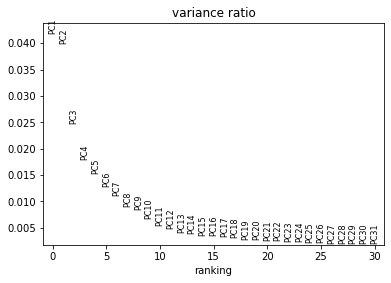

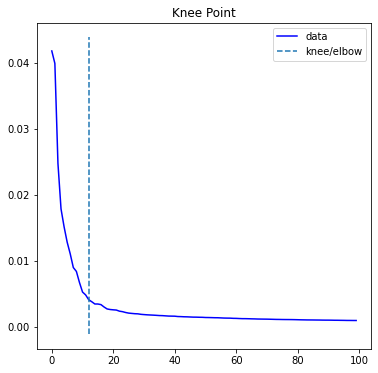

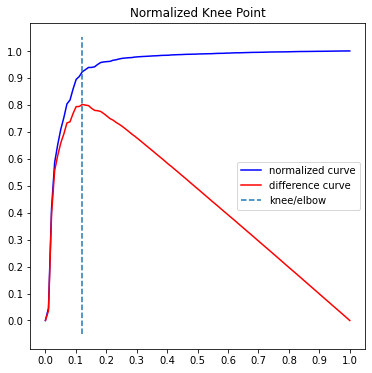

Kneepoint happens at PC: 12
12 PC explain 19.747912511229515 % of variance
2 PC explain 8.162308111786842 % of variance
3 PC explain 10.63754167407751 % of variance
4 PC explain 12.423636391758919 % of variance
5 PC explain 13.938220497220755 % of variance
6 PC explain 15.220790263265371 % of variance
7 PC explain 16.325521375983953 % of variance
8 PC explain 17.224136274307966 % of variance
9 PC explain 18.063633237034082 % of variance
10 PC explain 18.735902570188046 % of variance
11 PC explain 19.263451546430588 % of variance
12 PC explain 19.747912511229515 % of variance
13 PC explain 20.15987024642527 % of variance
14 PC explain 20.540841994807124 % of variance
15 PC explain 20.887855417095125 % of variance
16 PC explain 21.23439672868699 % of variance
17 PC explain 21.571629401296377 % of variance
18 PC explain 21.87300226651132 % of variance
19 PC explain 22.144670854322612 % of variance
20 PC explain 22.407877282239497 % of variance
21 PC explain 22.66651599202305 % of variance

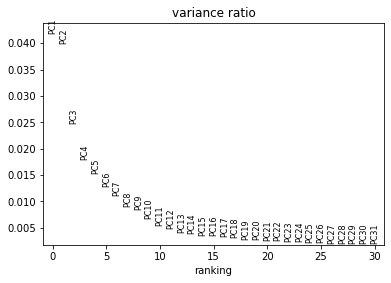

In [138]:
#select optimal number of PCs and recalculate PCs
number_of_PC_used = calculate_optimal_PC(adata, min_PC = 50, min_var=25, n_comps=100, use_hv=None)

In [139]:
sc.pp.neighbors(adata, n_neighbors=10, method= 'umap', n_pcs=number_of_PC_used)
sc.tl.umap(adata)

In [140]:
sc.tl.tsne(adata, random_state = 7, n_pcs=number_of_PC_used)

/home/wallet/miniconda3/envs/2022_Peer_SPADE_cellrank2/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [141]:
adata

AnnData object with n_obs × n_vars = 23754 × 19222
    obs: 'nCount_RNA', 'nFeature_RNA', 'Condition', 'StimType', 'Donor', 'pheno_k10', 'pheno_k20', 'pheno_k30', 'pheno_k40', 'pheno_k50', 'pheno_k60', 'pheno_k70', 'pheno_k80', 'pheno_k90', 'pheno_k100'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'log1p', 'neighbors', 'pca', 'tsne', 'umap', 'hvg'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'imputed', 'raw'
    obsp: 'connectivities', 'distances'

In [142]:
for j,k in enumerate(pheno_names):
        result_pheno_ndf_all = sce.tl.phenograph(adata.obsm['X_pca'], k = pheno_k[j],seed=1)
        adata.obs[k] = pd.Categorical(result_pheno_ndf_all[0])

Finding 10 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 13.442427158355713 seconds
Jaccard graph constructed in 9.411187410354614 seconds
Wrote graph to binary file in 0.10320496559143066 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.936934
Louvain completed 21 runs in 4.555778741836548 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 34.67171835899353 seconds
Finding 20 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 13.990336894989014 seconds
Jaccard graph constructed in 9.278786659240723 seconds
Wrote graph to binary file in 0.21050667762756348 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.92739
Louvain completed 21 runs in 6.418476343154907 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 37.20089054107666 seconds
Finding 30 nearest neighbors using minkowski metric a

In [143]:
a = magic(adata, copy=True, verbose=True, solver= 'exact', n_pca=adata.obsm['X_pca'].shape[1], knn=5, t=3)
adata.layers['imputed'] = a.X

Calculating MAGIC...
  Running MAGIC on 23754 cells and 19222 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 7.07 seconds.
    Calculating KNN search...
    Calculated KNN search in 25.16 seconds.
    Calculating affinities...
    Calculated affinities in 25.18 seconds.
  Calculated graph and diffusion operator in 57.45 seconds.
  Running MAGIC with `solver='exact'` on 19222-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 25.16 seconds.


/home/wallet/.local/lib/python3.10/site-packages/magic/utils.py:145: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  data = anndata.AnnData(data)


Calculated MAGIC in 83.79 seconds.


### save data

In [ ]:
#indicate save path
adata_save_path

In [ ]:
#save data
adata.write(adata_save_path)
print('adata written to', adata_save_path)

# plot

In [5]:
#define adata, clusters and marker genes for heatmaps here
adata_typing_path = DATA_DIR + 'PBMC-X-NA-X-Kartha-X-scRNAseq-X-10.1016_j.xgen.2022.100166_normalized_clustered_10000hv_batch.h5ad'
#adata_typing_path = DATA_DIR + 'PBMC-X-NA-X-Kartha-X-scRNAseq-X-10.1016_j.xgen.2022.100166_normalized_clustered_7500hv_batch.h5ad'
#adata_typing_path = DATA_DIR + 'PBMC-X-NA-X-Kartha-X-scRNAseq-X-10.1016_j.xgen.2022.100166_normalized_clustered_5000hv_batch.h5ad'
pheno_names = ['pheno_var_k10', 'pheno_var_k20', 'pheno_var_k30', 'pheno_var_k40', 'pheno_var_k50', 'pheno_var_k60',
              'pheno_var_k70','pheno_var_k80','pheno_var_k90','pheno_var_k100']
pheno_heat = 'pheno_var_k40'
continue_with_adata = False

In [6]:
adata = sc.read(adata_typing_path)
adata

Only considering the two last: ['.100166_normalized_clustered_10000hv_batch', '.h5ad'].
Only considering the two last: ['.100166_normalized_clustered_10000hv_batch', '.h5ad'].


AnnData object with n_obs × n_vars = 23754 × 19222
    obs: 'nCount_RNA', 'nFeature_RNA', 'Condition', 'StimType', 'Donor', 'pheno_k10', 'pheno_k20', 'pheno_k30', 'pheno_k40', 'pheno_k50', 'pheno_k60', 'pheno_k70', 'pheno_k80', 'pheno_k90', 'pheno_k100', 'pheno_var_k10', 'pheno_var_k20', 'pheno_var_k30', 'pheno_var_k40', 'pheno_var_k50', 'pheno_var_k60', 'pheno_var_k70', 'pheno_var_k80', 'pheno_var_k90', 'pheno_var_k100'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'imputed', 'raw'
    obsp: 'connectivities', 'distances'

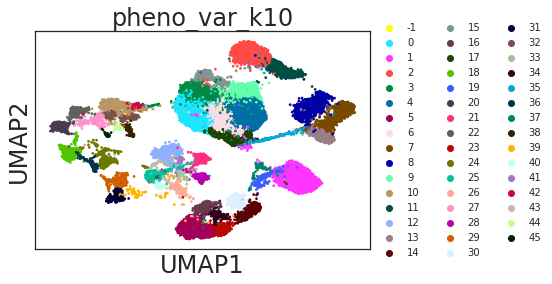

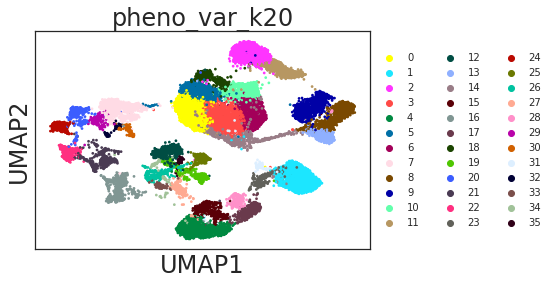

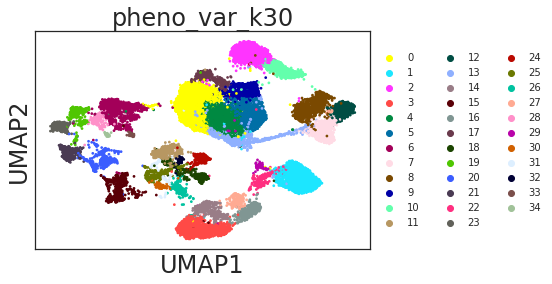

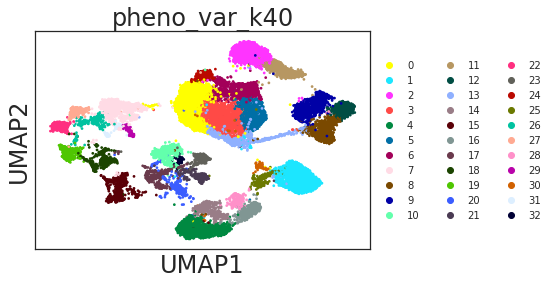

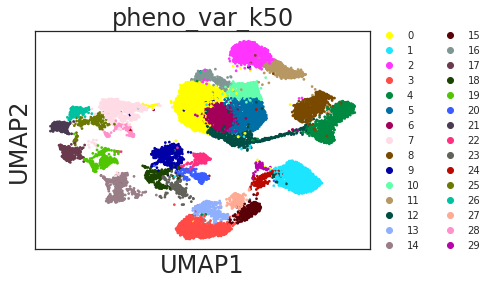

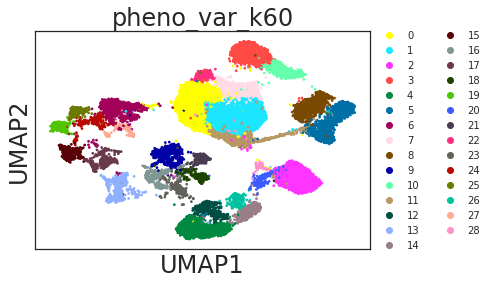

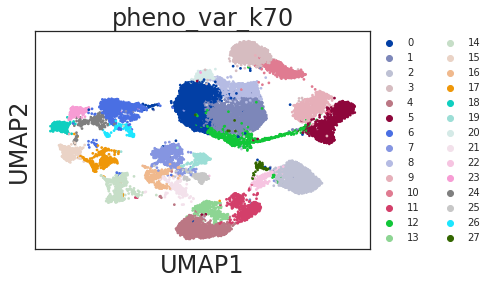

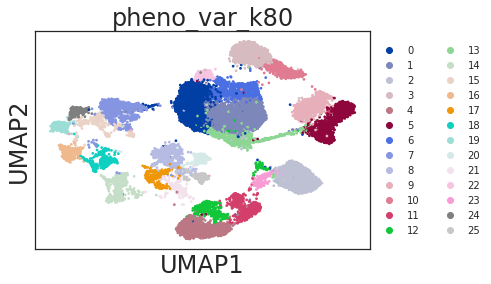

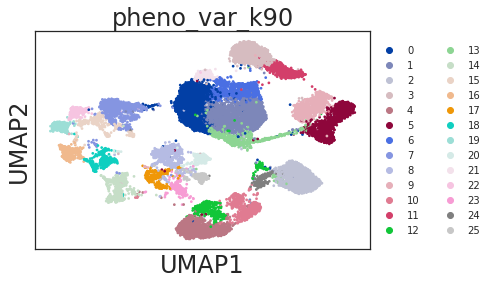

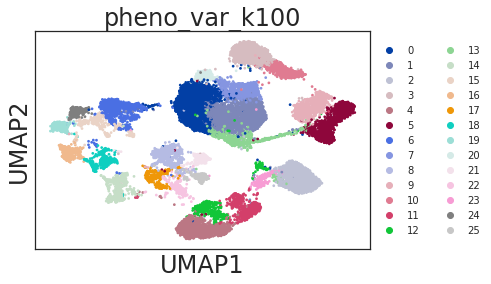

In [62]:
sns.set_style('white')
for i in pheno_names:
    sc.pl.umap(adata, color = i, s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0)


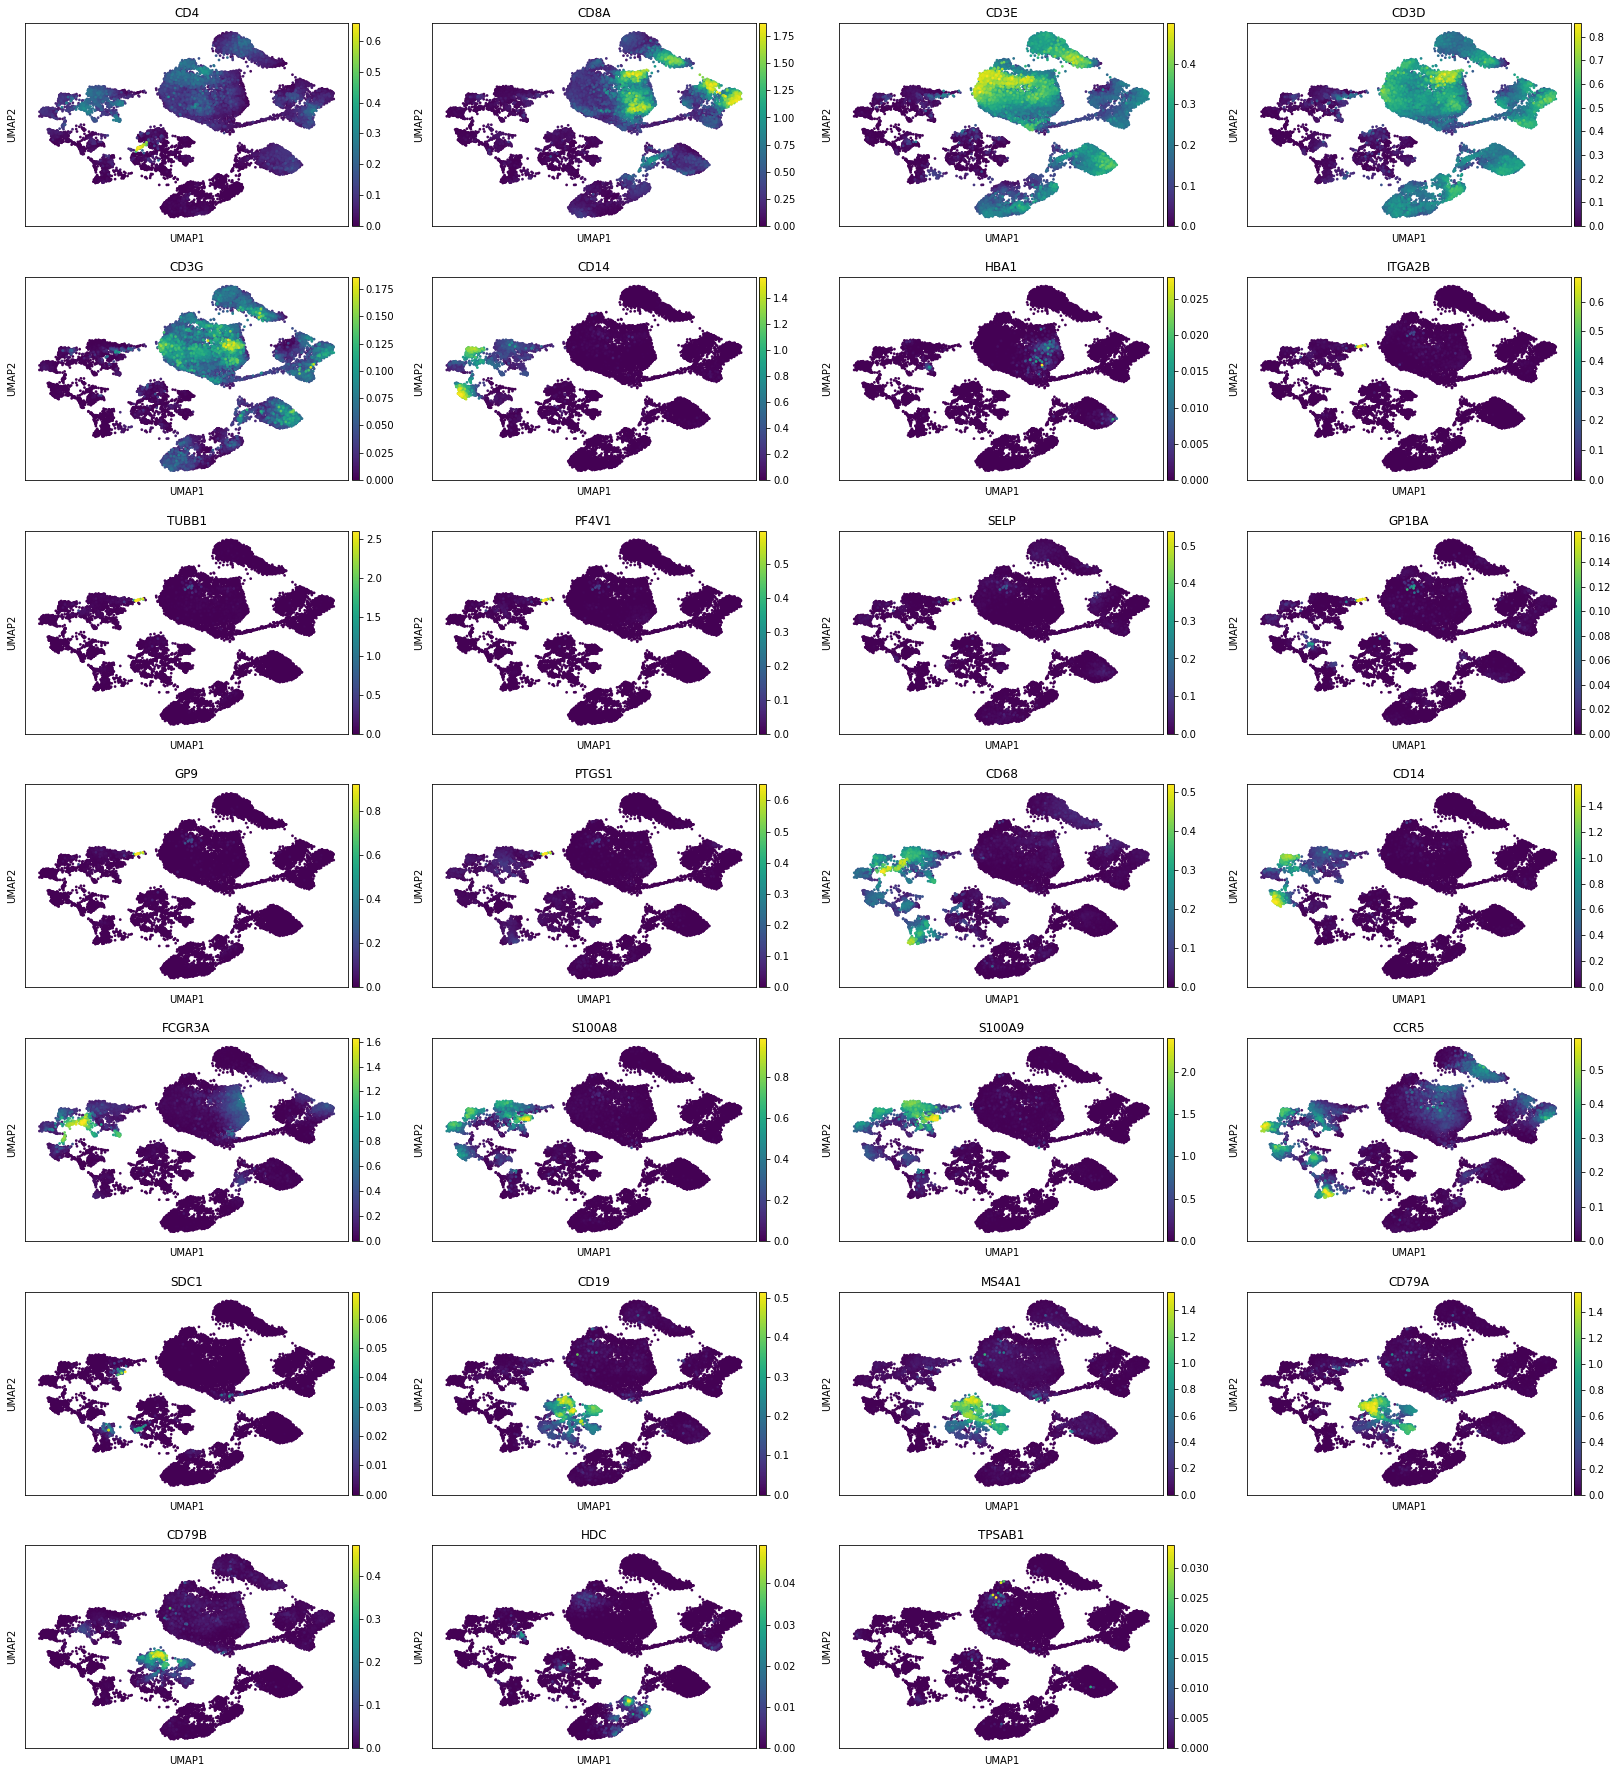

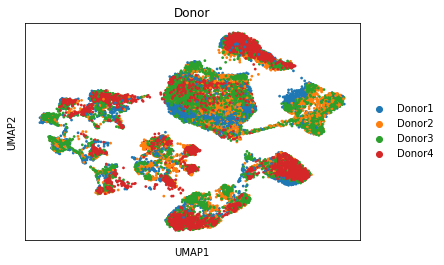

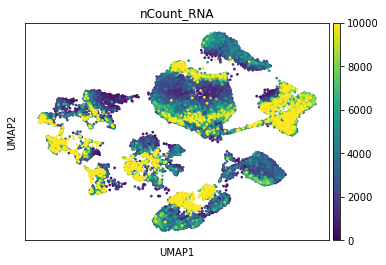

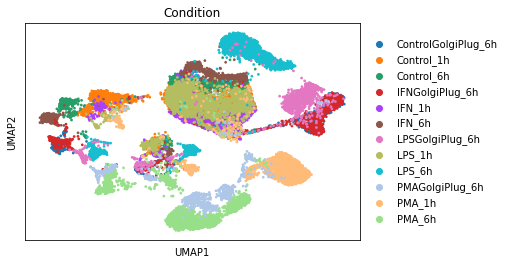

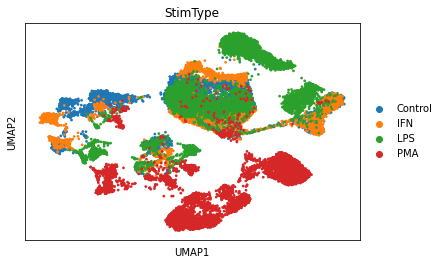

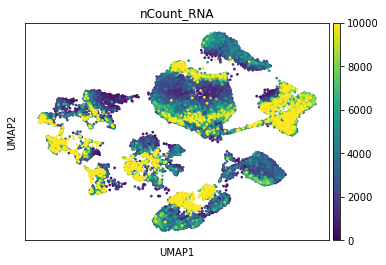

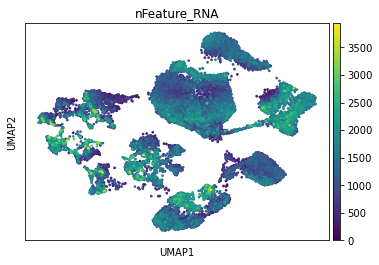

In [27]:
#10000hv
markers = ['CD4','CD8A','CD3E','CD3D','CD3G','CD14','HBA1','ITGA2B', 'TUBB1', 'PF4V1', 'SELP', 'GP1BA', 'GP9', 'PTGS1',
                          'CD68','CD14','FCGR3A','S100A8','S100A9','CCR5',
                          'SDC1','CD19','MS4A1','CD79A','CD79B','IGHG1'
                           'MS4A2','HDC','TPSAB1','TPSAB2','TPSD']
sc.pl.umap(adata, color = [x for x in markers if x in adata.var_names], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0)
sc.pl.umap(adata, color = ['Donor',], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0,
           vmax=10000)
sc.pl.umap(adata, color = ['nCount_RNA'], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0,
           vmax=10000)
sc.pl.umap(adata, color = ['Condition'], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0,
           vmax=10000)
sc.pl.umap(adata, color = ['StimType',
                          ], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0,
           vmax=10000)
sc.pl.umap(adata, color = [
                          'nCount_RNA', ], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0,
           vmax=10000)
sc.pl.umap(adata, color = [ 'nFeature_RNA',], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0)

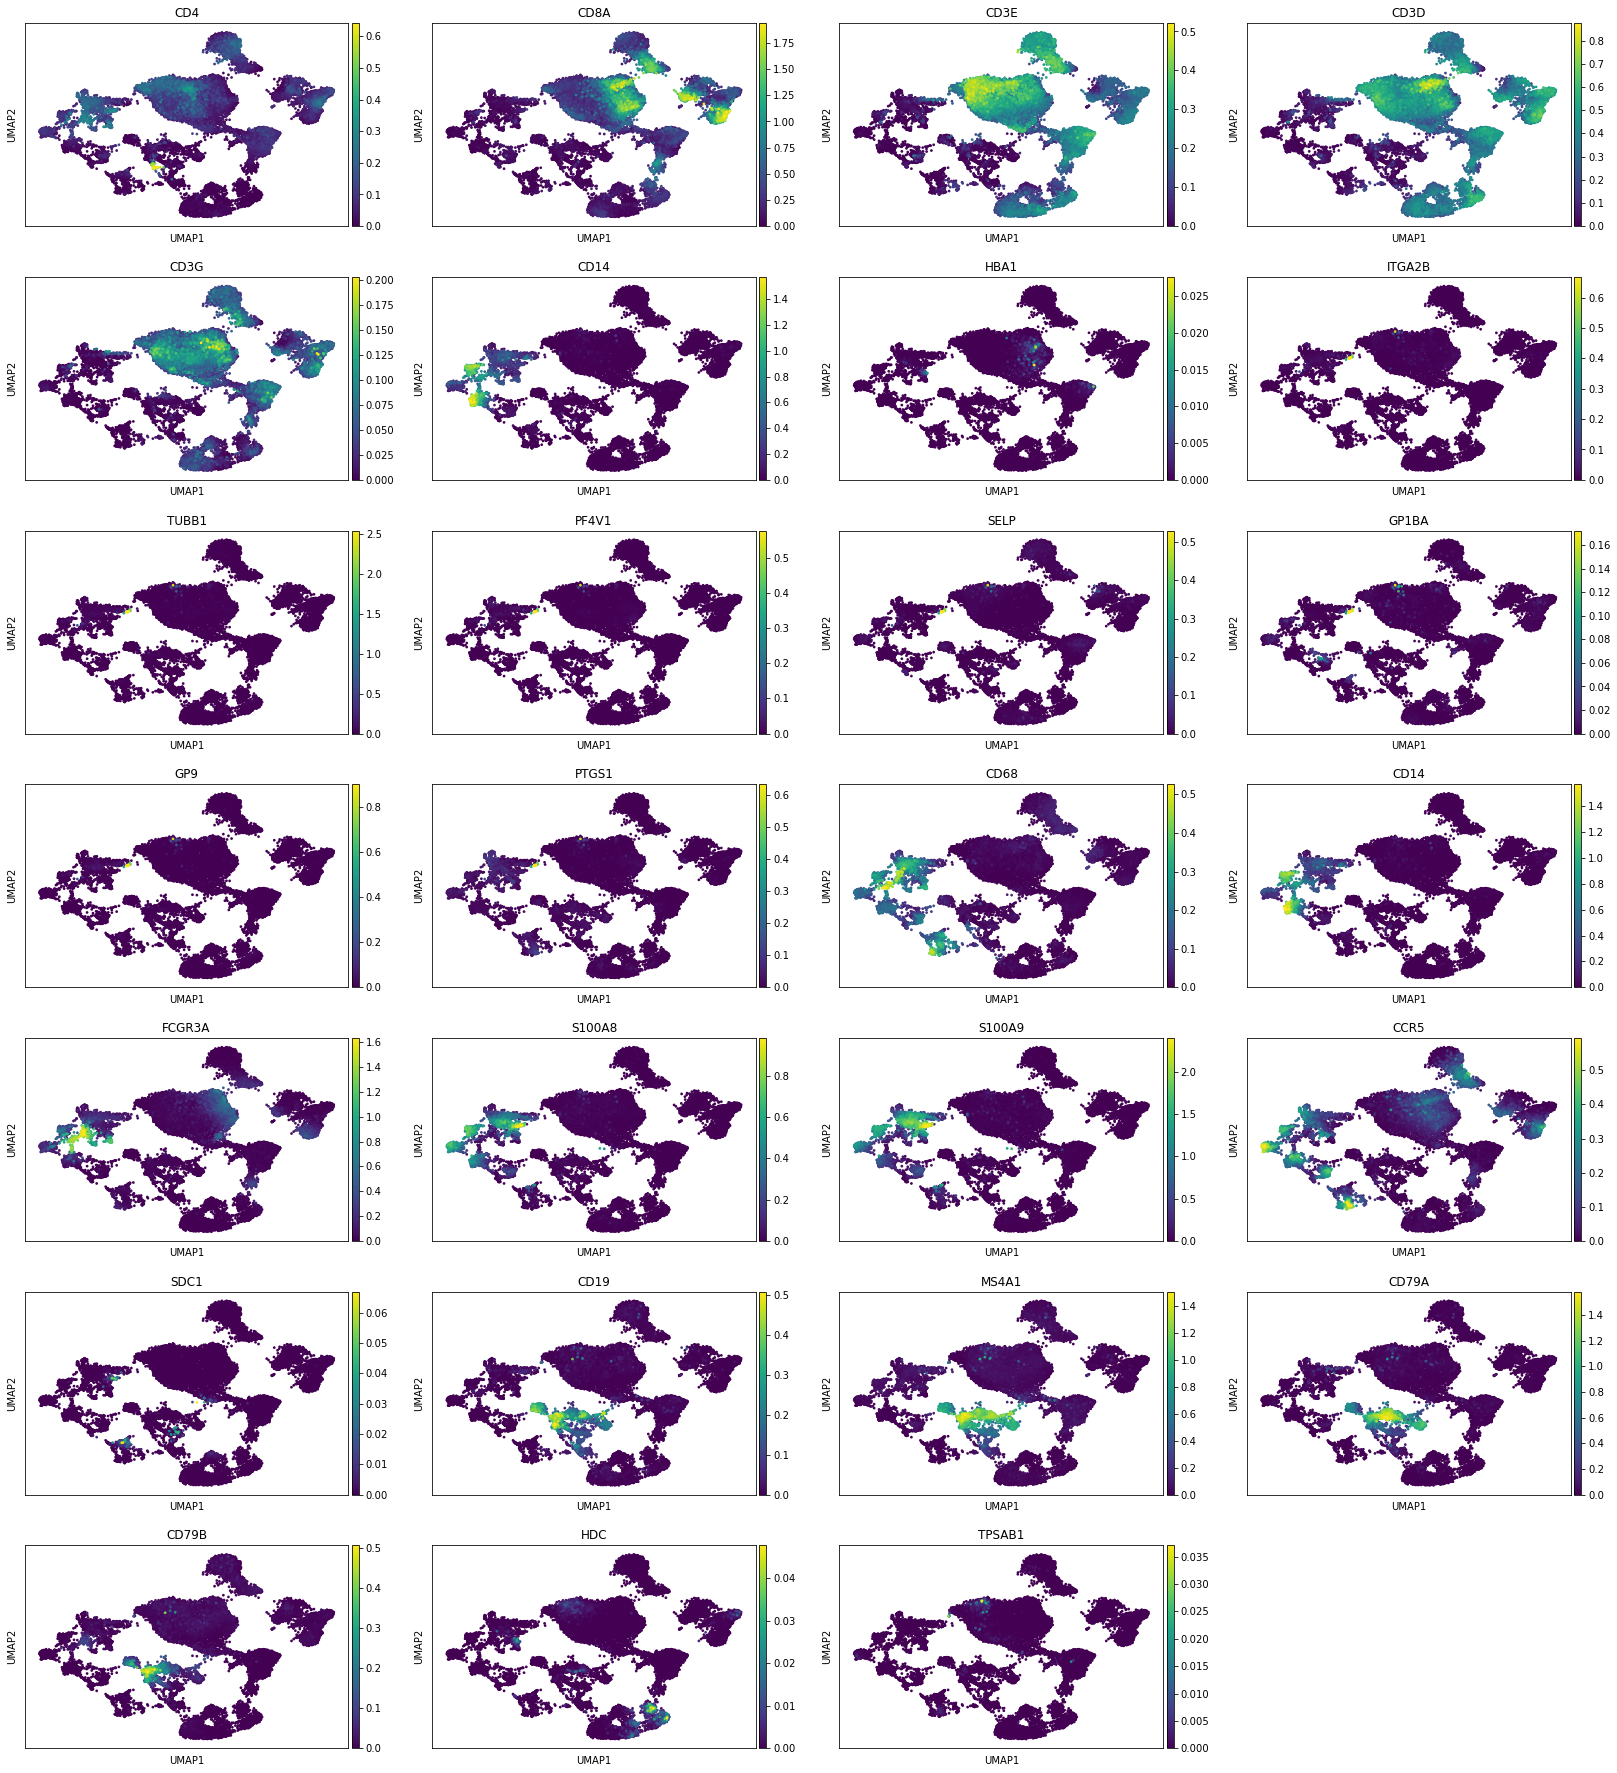

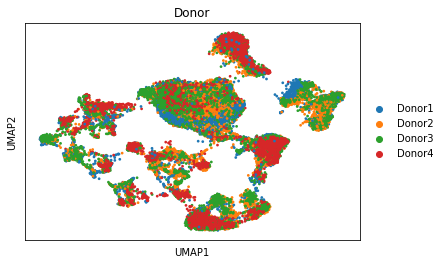

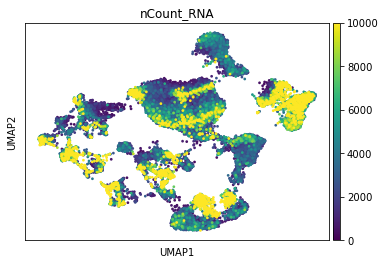

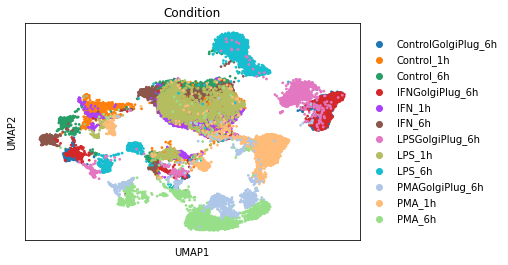

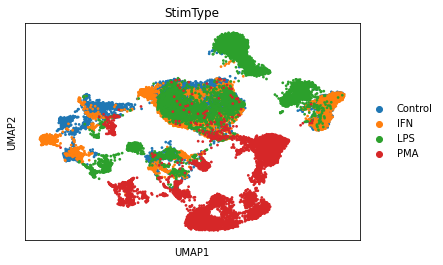

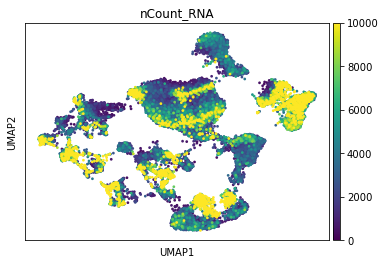

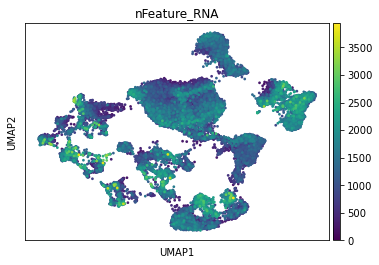

In [24]:
#7500hv
markers = ['CD4','CD8A','CD3E','CD3D','CD3G','CD14','HBA1','ITGA2B', 'TUBB1', 'PF4V1', 'SELP', 'GP1BA', 'GP9', 'PTGS1',
                          'CD68','CD14','FCGR3A','S100A8','S100A9','CCR5',
                          'SDC1','CD19','MS4A1','CD79A','CD79B','IGHG1'
                           'MS4A2','HDC','TPSAB1','TPSAB2','TPSD']
sc.pl.umap(adata, color = [x for x in markers if x in adata.var_names], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0)
sc.pl.umap(adata, color = ['Donor',], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0,
           vmax=10000)
sc.pl.umap(adata, color = ['nCount_RNA'], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0,
           vmax=10000)
sc.pl.umap(adata, color = ['Condition'], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0,
           vmax=10000)
sc.pl.umap(adata, color = ['StimType',
                          ], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0,
           vmax=10000)
sc.pl.umap(adata, color = [
                          'nCount_RNA', ], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0,
           vmax=10000)
sc.pl.umap(adata, color = [ 'nFeature_RNA',], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0)

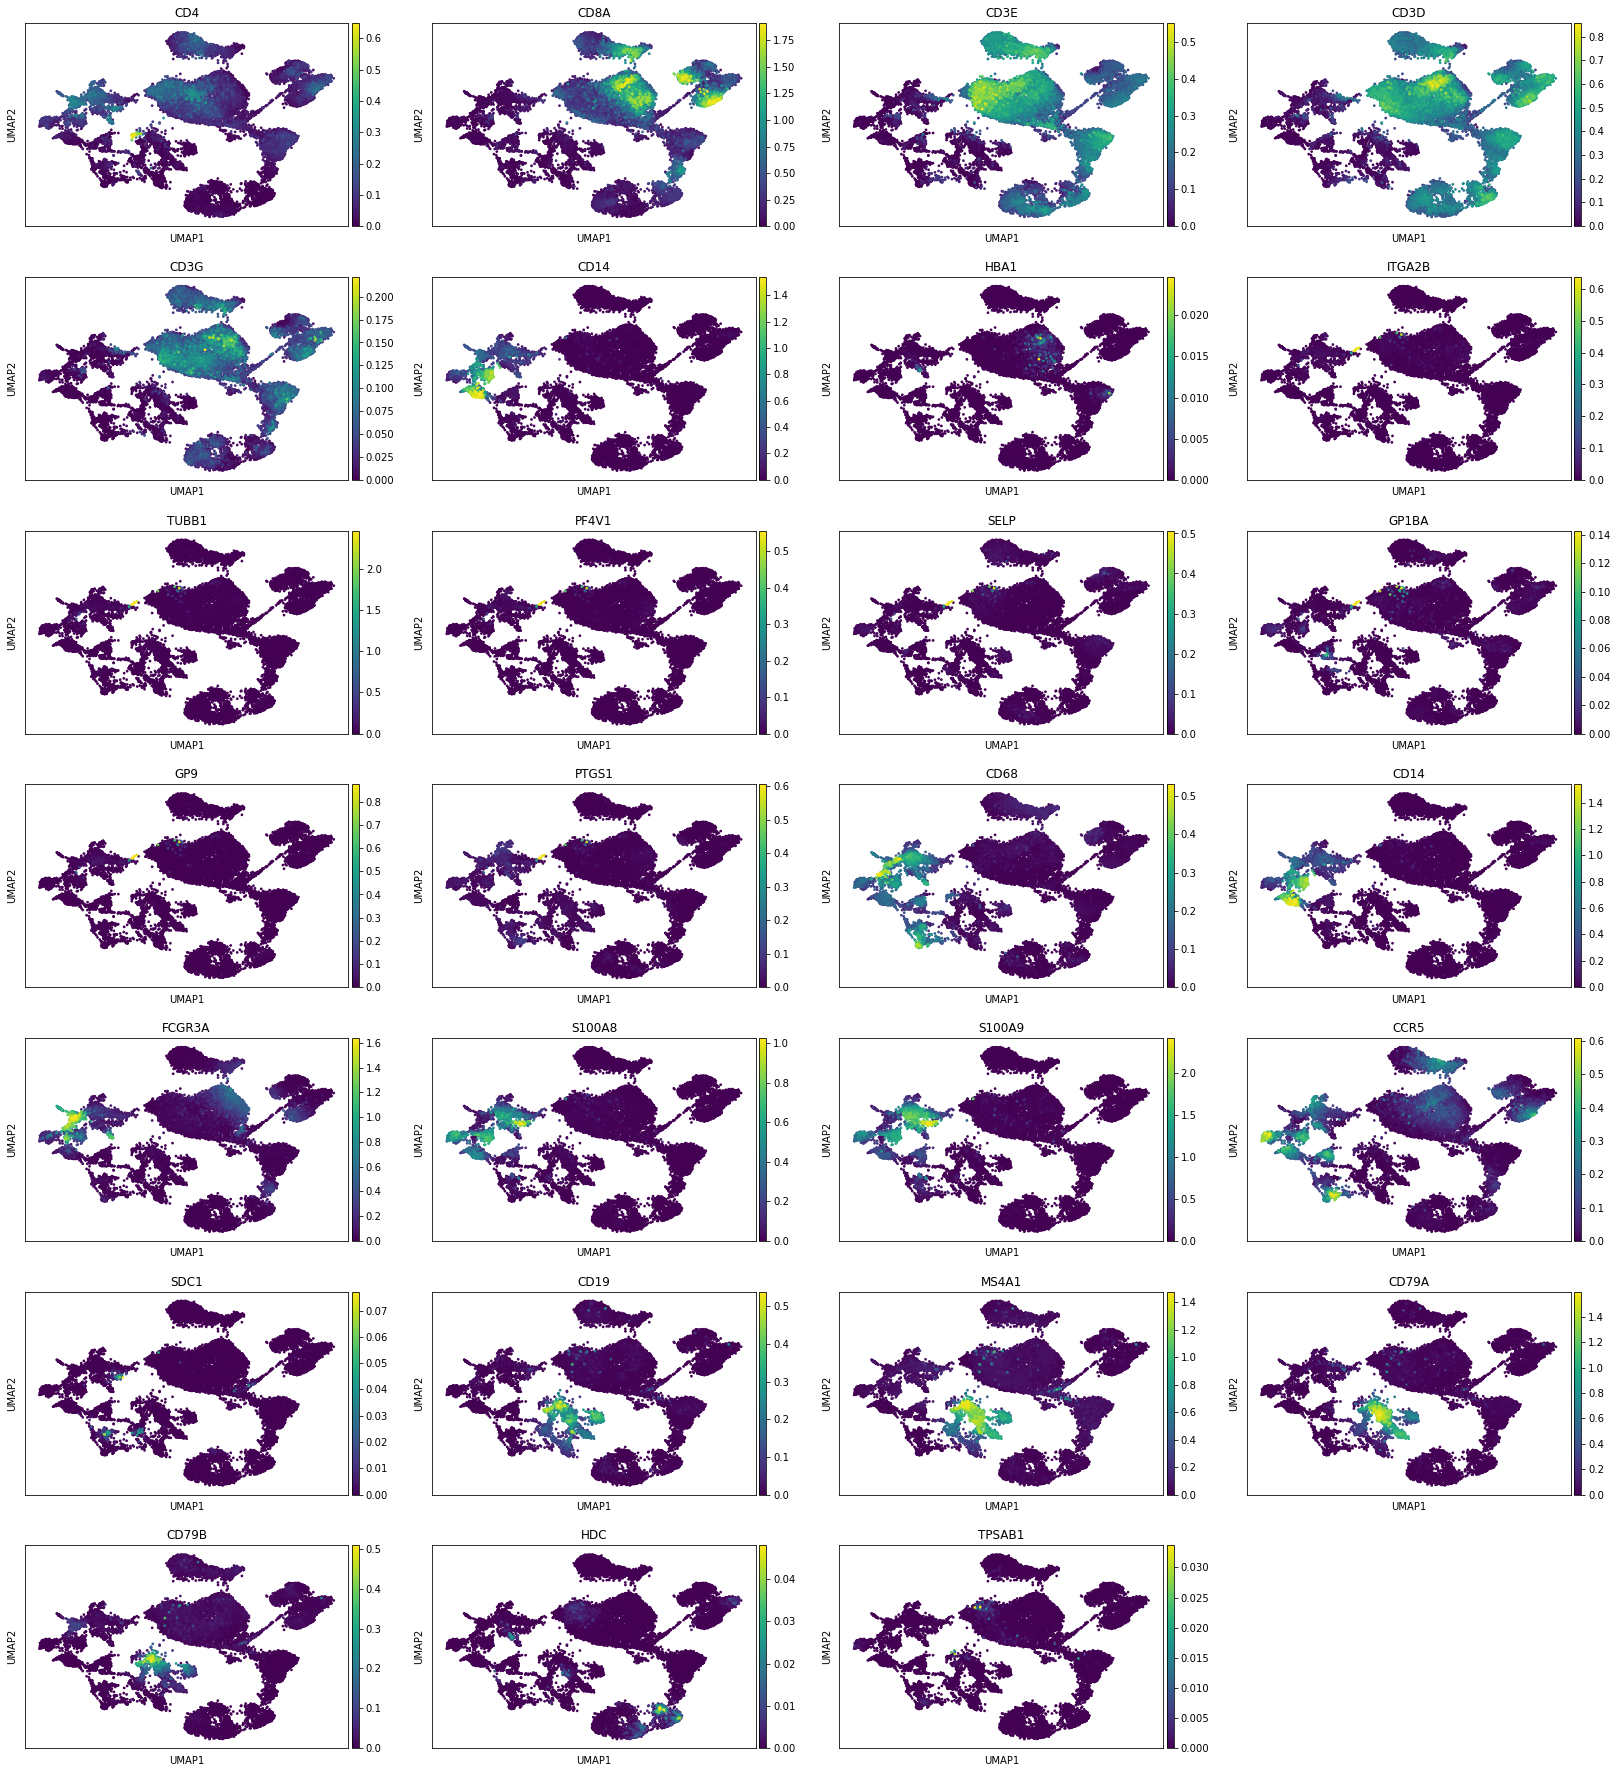

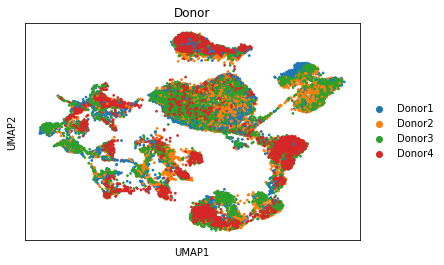

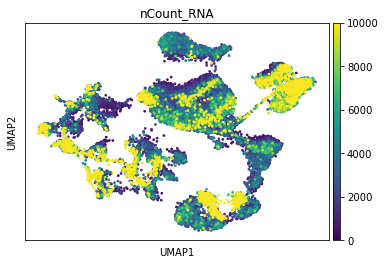

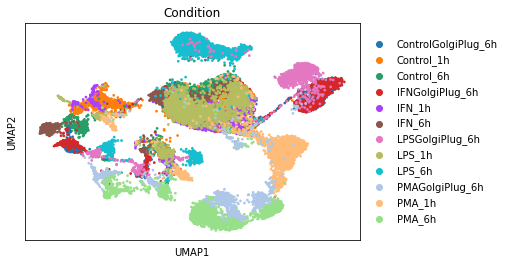

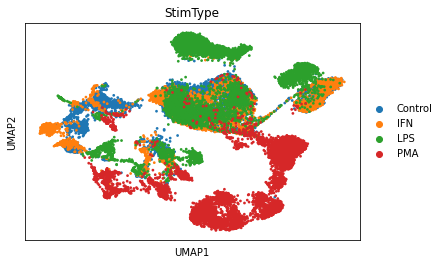

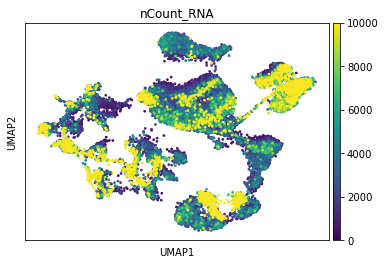

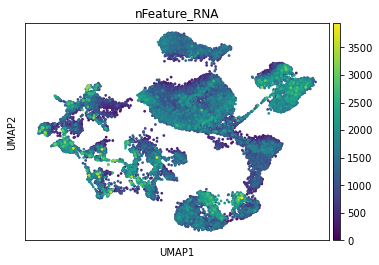

In [13]:
#5000hv
markers = ['CD4','CD8A','CD3E','CD3D','CD3G','CD14','HBA1','ITGA2B', 'TUBB1', 'PF4V1', 'SELP', 'GP1BA', 'GP9', 'PTGS1',
                          'CD68','CD14','FCGR3A','S100A8','S100A9','CCR5',
                          'SDC1','CD19','MS4A1','CD79A','CD79B','IGHG1'
                           'MS4A2','HDC','TPSAB1','TPSAB2','TPSD']
sc.pl.umap(adata, color = [x for x in markers if x in adata.var_names], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0)
sc.pl.umap(adata, color = ['Donor',], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0,
           vmax=10000)
sc.pl.umap(adata, color = ['nCount_RNA'], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0,
           vmax=10000)
sc.pl.umap(adata, color = ['Condition'], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0,
           vmax=10000)
sc.pl.umap(adata, color = ['StimType',
                          ], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0,
           vmax=10000)
sc.pl.umap(adata, color = [
                          'nCount_RNA', ], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0,
           vmax=10000)
sc.pl.umap(adata, color = [ 'nFeature_RNA',], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0)

In [14]:
import cytopus as cp

In [15]:
G = cp.kb.KnowledgeBase()

KnowledgeBase object containing 75 cell types and 201 cellular processes



In [18]:
G.processes.keys()

dict_keys(['lung-smooth-muscle_TGFB1_response', 'all_pyrimidine_metabolism', 'all_ros_response', 'all_autophagic-cell-death', 'all_DNA-methylation', 'all_eicosanoid_metabolism', 'all_MHC-I-presentation', 'B_Breg_UP', 'all_bile-acid_synthesis', 'all_MHC-II-presentation', 'all_autophagy-selective', 'all_heparan-sulfate_degradation', 'all_galactose_metabolism', 'all_transmembrane-transport-lysosome', 'fibro_BMP4_response', 'all_steroid_metabolism', 'all_mitophagy', 'fibro_EGF_response', 'CD4-T_TH2_UP', 'all_complement_production', 'p-DC_CpG-TLR9_response', 'all_mitophagy_regulation_positive', 'Mac_LPS_response', 'all_autophagy-peroxisome', 'all_DNA-demethylation', 'all_coagulation-factor_production', 'all_GABA-shunt', 'all_selenoamino-acid_metabolism', 'all_pyruvate_metabolism', 'TNK_cytotoxicity-effectors', 'M_IL17A_response', 'all_creatinine_metabolism', 'all_peroxisome-component', 'lung-epi_IL13_response', 'all_glyoxylate-dicarboxylate_metabolism', 'DC_CD40L_response', 'all_DNA-repair'

## typing heatmaps

In [38]:
#define marker genes
load_marker_genes = True
marker_genes_path = DATA_DIR + 'immune_marker_panel_clean_210216.csv'#path of marker gene csv file with gene column
gene_column_name = 'gene_name' #name of column in csv file where gene names are located

#define visualization parameters
layer_heat_imputed = True
z_score_cluster = False
cluster_minus_one_present = False #when PhenoGraph cannot put cells into a cluster it will label these cells with -1, if this is True these cells will not be plotted in the heatmaps
z_score_cells = True #if True gene expression will be z scored across cells and average z score per cluster will be calculated, if false average gene expression per cluster will be calculated and z scored across clusters
celltypes = ['gran',
 'cDC',
 'Mac',
 'CD4-T',
 'B-pb-t2',
 'B-pb-mature',
 'cDC2',
 'mono',
 'TCM',
 'B-memory-switched',
 'GC-B',
 'mo-DC',
 'cDC1',
 'B',
 'CD8-T_KLRG1neg-effector',
 'NK',
 'B-memory-IgM-MZ',
 'ILC2',
 'TEM',
 'T-naive',
 'CD56dim-NK',
 'TRM',
 'ILC',
 'TSCM',
 'ILC1',
 'CD8-T',
 'M',
 'eosino',
 'all-cells',
 'B-pb-t1',
 'mast',
 'B-memory',
 'DC',
 'ILC3-NCRpos',
 'ILC3-NCRneg',
 'CD56bright-NK',
 'TNK',
 'B-memory-non-switched',
 'plasma-blast',
 'cDC3',
 'NK-adaptive',
 'MDC',
 'FDC',
 'ILC3',
 'baso',
 'Lti',
 'TFH',
 'Treg',
 'B-memory-DN',
 'crc-carcinoma-cell',
 'Langerhans',
 'T',
 'CD8-T-progenitor-exhausted',
 'gdT',
 'leukocyte',
 'B-naive',
 'neutro',
 'plasma',
 'p-DC',
 'CD8-T_KLRG1pos-effector']
#dictionary containing major subtype identities
#cluster_marker_dict_overlap = {'B':list(range(19)),'M':list(range(37))} #dictionary holding overlap gene sets

In [40]:
#if needed custom marker genes

marker_genes_custom = []

In [41]:
#all identity gnene sets
identity_genes = []
G= cp.kb.KnowledgeBase()
for k,v in G.identities.items():
    if k in celltypes:
        identity_genes = identity_genes+v

KnowledgeBase object containing 75 cell types and 201 cellular processes



In [42]:
##### load marker genes

if load_marker_genes ==True:
    marker_genes_df = pd.read_csv(marker_genes_path)
    ##add additional genes of interest here
    interesting_genes= ['CD4','CD8A','CD3E','CD3D','CD3G','CD14','HBA1','ITGA2B', 'TUBB1', 'PF4V1', 'SELP', 'GP1BA', 'GP9', 'PTGS1',
                          'CD68','CD14','FCGR3A','S100A8','S100A9','CCR5',
                          'SDC1','CD19','MS4A1','CD79A','CD79B','IGHG1'
                           'MS4A2','HDC','TPSAB1','TPSAB2','TPSD'] + identity_genes
    #extract gene names and combine lists
    marker_genes_df = marker_genes_df[marker_genes_df['species']=='homo_sapiens']
    marker_genes_df = marker_genes_df[marker_genes_df['leukocyte_important_marker']==True]
    marker_genes = list(marker_genes_df.loc[:,gene_column_name])
    marker_genes = marker_genes + interesting_genes
    marker_genes = list(set(marker_genes))
else:
    marker_genes = list(set(marker_genes_custom))
        

In [47]:
marker_genes_filtered = list(set([x for x in marker_genes if x in adata.var_names]))

In [48]:
len(marker_genes)

270

In [44]:
adata.var[adata.var['highly_variable']]

highly_variable  highly_variable_rank     means  variances  \
genes                                                                      
WASH7P                   True                4106.0  0.000421   0.000758   
LOC100133331             True                3640.0  0.000884   0.001810   
LOC100288069             True                5860.0  0.000505   0.001263   
LINC01128                True                6365.0  0.077924   0.294311   
PLEKHN1                  True                 941.0  0.001768   0.005386   
...                       ...                   ...       ...        ...   
TTTY15                   True                5676.5  0.042435   0.188238   
USP9Y                    True                4836.0  0.167593   0.615999   
NLGN4Y                   True                5925.5  0.001137   0.003830   
CD24                     True                 828.5  0.036120   0.220225   
BCORP1                   True                2175.0  0.011619   0.041881   

              variances_norm  highly_variable_nbatches  
genes                                                   
WASH7P              0.685519                         1  
LOC100133331        0.707800                         1  
LOC100288069        0.786011                         3  
LINC01128           0.999689                         3  
PLEKHN1             0.963526                         1  
...                      ...                       ...  
TTTY15              1.083724                         4  
USP9Y               0.787193                         1  
NLGN4Y              0.748044                         2  
CD24                1.725675                         4  
BCORP1              0.825311                         2  

[10074 rows x 6 columns]

In [45]:
if z_score_cells == False and z_score_cluster == False:
    
    ## calculate means for each cluster and export to dataframe
    all_cells_df_clean = adata.obs[pheno_heat] 
    clusters_cells_clean = list(set(all_cells_df_clean.values))
    
    ## remove -1 cells not belonging to any cluster
    if cluster_minus_one_present == True:
        clusters_cells_clean.remove(-1) #optional if -1 in heatmap
    
    ## create empty dataframe
    marker_df = pd.DataFrame(index=clusters_cells_clean, columns=marker_genes_filtered)
    marker_df = marker_df.astype('float') 
    
    ## select imputed or raw layer 
    if layer_heat_imputed == True:
        gene_expression_zscored = pd.DataFrame(
        adata.layers['imputed'], index=adata.obs_names, columns=adata.var_names)
    else:
        gene_expression_zscored = pd.DataFrame(
        adata.X, index=adata.obs_names, columns=adata.var_names)

    for i in clusters_cells_clean:
        print('Cluster: ',i)
        cluster_adata = all_cells_df_clean[all_cells_df_clean==i]
        cluster_adata2 = gene_expression_zscored.loc[cluster_adata.index, :]
        for j in marker_genes_filtered:
            marker_df.loc[i,:] = np.mean(cluster_adata2, axis=0)
            
    %matplotlib inline
    
    # drop na columns
    marker_df = marker_df.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
    
    # drop all zero columns
    non_zero = (marker_df != 0).any(axis=0)
    marker_df = marker_df[non_zero.index[non_zero]]#drop zeros columns bc SD will be 0 --> cant divide with 0 for z score
    
    # set color scale
    divnorm = colors.DivergingNorm(vmin=-1, vcenter=0, vmax=1)
    marker_df = marker_df.astype(float) #  gene expression means x pheno cluster matrix
    sns.set(font_scale = 2) # if error matplotlib has no attribute DivergingNorm appears update Matplotlib
    sns.clustermap(marker_df, cmap='bwr', col_cluster=True, figsize=(50,10), vmax=3, z_score= False, norm=divnorm) # if error matplotlib has no attribute DivergingNorm appears update Matplotlib

Cluster:  0
Cluster:  1
Cluster:  2
Cluster:  3
Cluster:  4
Cluster:  5
Cluster:  6
Cluster:  7
Cluster:  8
Cluster:  9
Cluster:  10
Cluster:  11
Cluster:  12
Cluster:  13
Cluster:  14
Cluster:  15
Cluster:  16
Cluster:  17
Cluster:  18
Cluster:  19
Cluster:  20
Cluster:  21
Cluster:  22
Cluster:  23
Cluster:  24
Cluster:  25
Cluster:  26
Cluster:  27
Cluster:  28
Cluster:  29
Cluster:  30
Cluster:  31
Cluster:  32


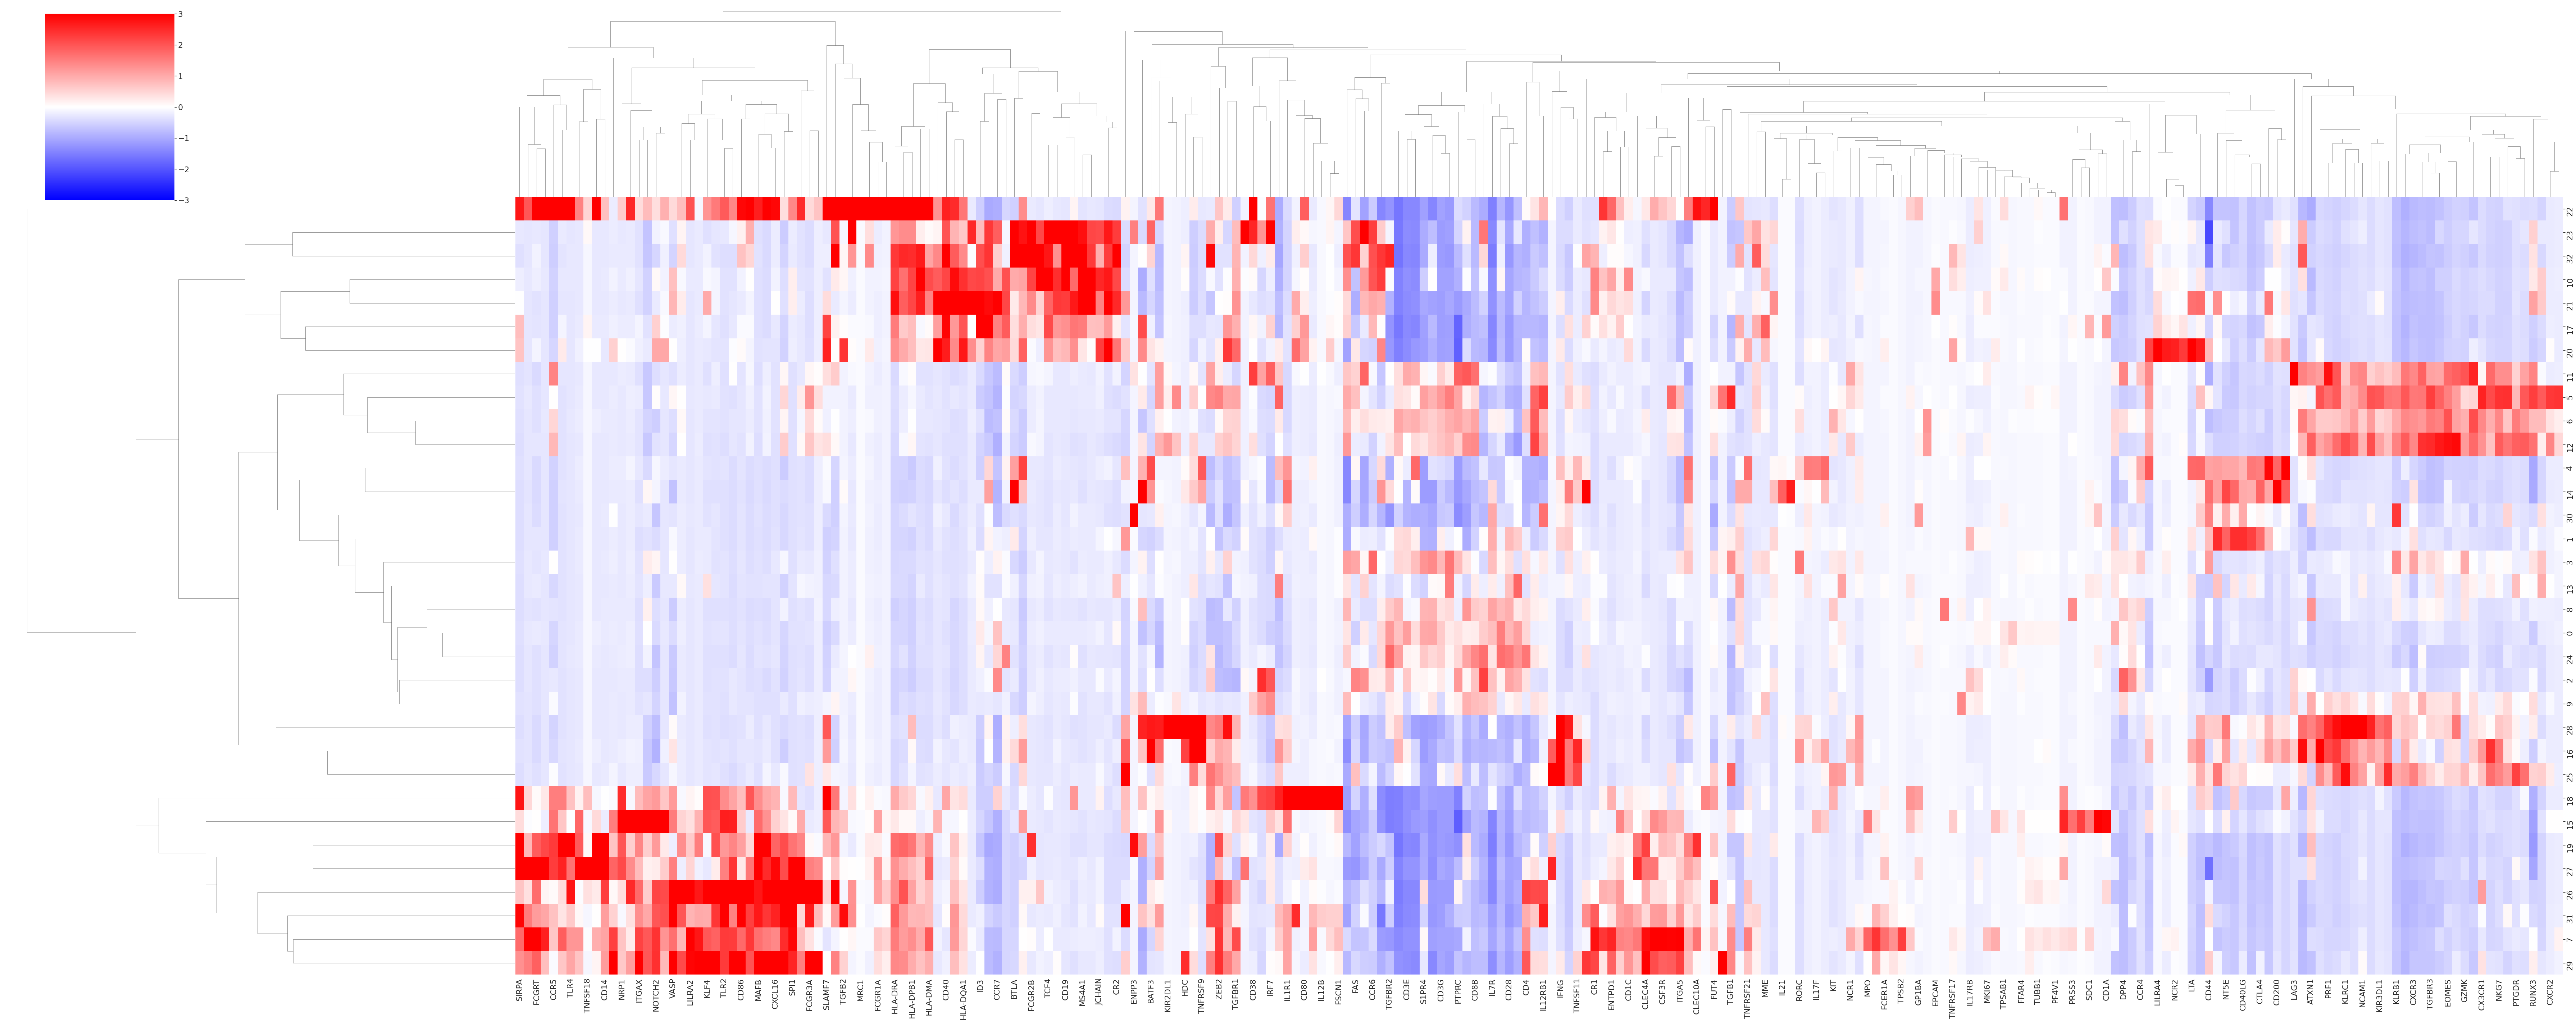

In [49]:
if z_score_cells == True and z_score_cluster == False:   
    
    ## calculate means for each cluster and export to dataframe
    all_cells_df_clean = adata.obs[pheno_heat] 
    clusters_cells_clean = list(set(all_cells_df_clean.values))
    
    ## remove -1 cells not belonging to any cluster
    if cluster_minus_one_present == True:
        clusters_cells_clean.remove(-1) #optional if -1 in heatmap
        
    ## create empty dataframe
    marker_df = pd.DataFrame(index=clusters_cells_clean, columns=marker_genes_filtered)
    marker_df = marker_df.astype('float')
 
    ## select imputed or raw layer   
    if layer_heat_imputed == True:
        gene_expression_zscored = pd.DataFrame(scipy.stats.zscore(adata.layers['imputed'],axis=0), index=adata.obs_names, columns=adata.var_names) # create zscored gene expression df
    else:
        gene_expression_zscored = pd.DataFrame(scipy.stats.zscore(adata.X, axis=0), index=adata.obs_names, columns=adata.var_names)
        
    for i in clusters_cells_clean:
        print('Cluster: ',i)
        cluster_adata = all_cells_df_clean[all_cells_df_clean==i]
        cluster_adata2 = gene_expression_zscored.loc[cluster_adata.index, :]
        for j in marker_genes_filtered:
            marker_df.loc[i,:] = np.mean(cluster_adata2, axis=0)

    %matplotlib inline

    # drop na columns
    marker_df = marker_df.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)

    # drop all zero columns
    non_zero = (marker_df != 0).any(axis=0)
    marker_df = marker_df[non_zero.index[non_zero]]#drop zeros columns bc SD will be 0 --> cant divide with 0 for z score

    # set color scale
    #divnorm = colors.DivergingNorm(vmin=-2, vcenter=0, vmax=2)
    marker_df = marker_df.astype(float) #  gene expression means x pheno cluster matrix
    sns.set(font_scale = 2) # if error matplotlib has no attribute DivergingNorm appears update Matplotlib
    sns.clustermap(marker_df, cmap='bwr', col_cluster=True, figsize=(100,40), vmin=-3,center=0,vmax=3, z_score=None) # if error matplotlib has no attribute DivergingNorm appears update Matplotlib

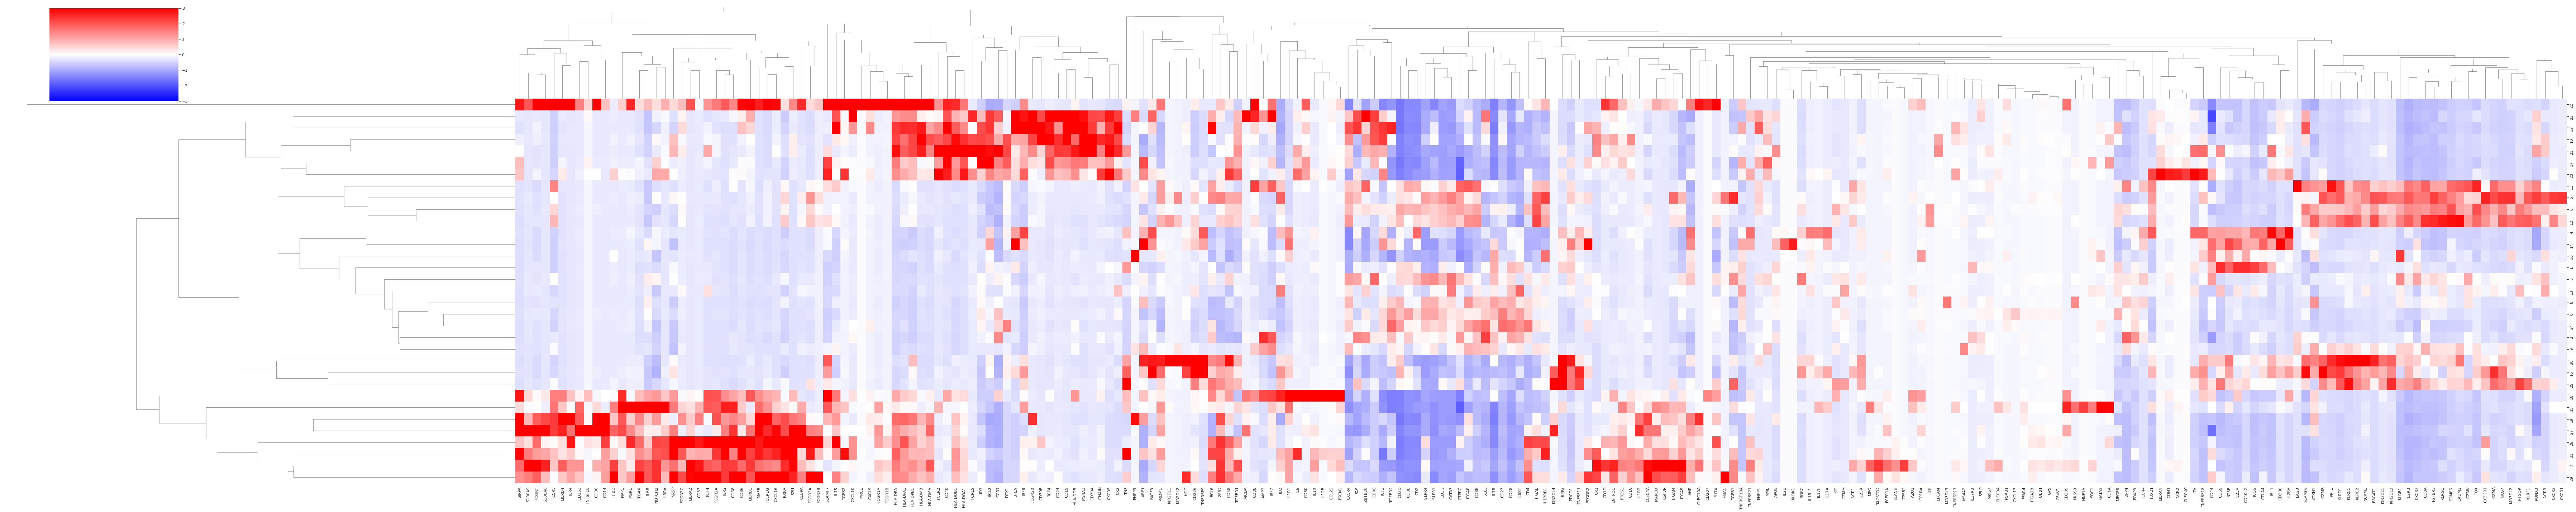

In [112]:
sns.set(font_scale=1)
sns.set_style('white')
sns.clustermap(marker_df, cmap='bwr', col_cluster=True, figsize=(100,20), vmin=-3,center=0,vmax=3, z_score=None) # if error matplotlib has no attribute DivergingNorm appears update Matplotlib

In [ ]:
if z_score_cluster ==True and z_score_cluster == False:
    ## calculate means for each cluster and export to dataframe
    all_cells_df_clean = adata.obs[pheno_heat] 
    clusters_cells_clean = list(set(all_cells_df_clean.values))
    
    ## remove -1 cells not belonging to any cluster
    if cluster_minus_one_present == True:
        clusters_cells_clean.remove(-1) #optional if -1 in heatmap
    
    ## create empty dataframe
    marker_df = pd.DataFrame(index=clusters_cells_clean, columns=marker_genes_filtered)
    marker_df = marker_df.astype('float') 
    
    ## select imputed or raw layer 
    if layer_heat_imputed == True:
        gene_expression_zscored = pd.DataFrame(
        adata.layers['imputed'], index=adata.obs_names, columns=adata.var_names)
    else:
        gene_expression_zscored = pd.DataFrame(
        adata.X, index=adata.obs_names, columns=adata.var_names)

    for i in clusters_cells_clean:
        print('Cluster: ',i)
        cluster_adata = all_cells_df_clean[all_cells_df_clean==i]
        cluster_adata2 = gene_expression_zscored.loc[cluster_adata.index, :]
        for j in marker_genes_filtered:
            marker_df.loc[i,:] = np.mean(cluster_adata2, axis=0)
            
    %matplotlib inline
    
    # drop na columns
    marker_df = marker_df.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
    
    # drop all zero columns
    non_zero = (marker_df != 0).any(axis=0)
    marker_df = marker_df[non_zero.index[non_zero]]#drop zeros columns bc SD will be 0 --> cant divide with 0 for z score
    
    # set color scale
    divnorm = colors.DivergingNorm(vmin=-1, vcenter=0, vmax=1)
    marker_df = marker_df.astype(float) #  gene expression means x pheno cluster matrix
    sns.set(font_scale = 2) # if error matplotlib has no attribute DivergingNorm appears update Matplotlib
    sns.clustermap(marker_df, cmap='bwr', col_cluster=True, figsize=(50,10), vmax=3, z_score= 1, norm=divnorm) # if error matplotlib has no attribute DivergingNorm appears update Matplotlib

In [ ]:
#dotplot
%matplotlib inline
sns.set(font_scale = 1.5)
sns.set_style('white')
sc.tl.dendrogram(adata, groupby=pheno_heat)
sc.pl.dotplot(adata, marker_genes_filtered, groupby=pheno_heat, dendrogram=False, standard_scale='var')

In [ ]:
sns.clustermap(marker_df, cmap='bwr', col_cluster=True, figsize=(100,40), vmin=-3,center=0,vmax=3, z_score=None) # if error matplotlib has no attribute DivergingNorm appears update Matplotlib

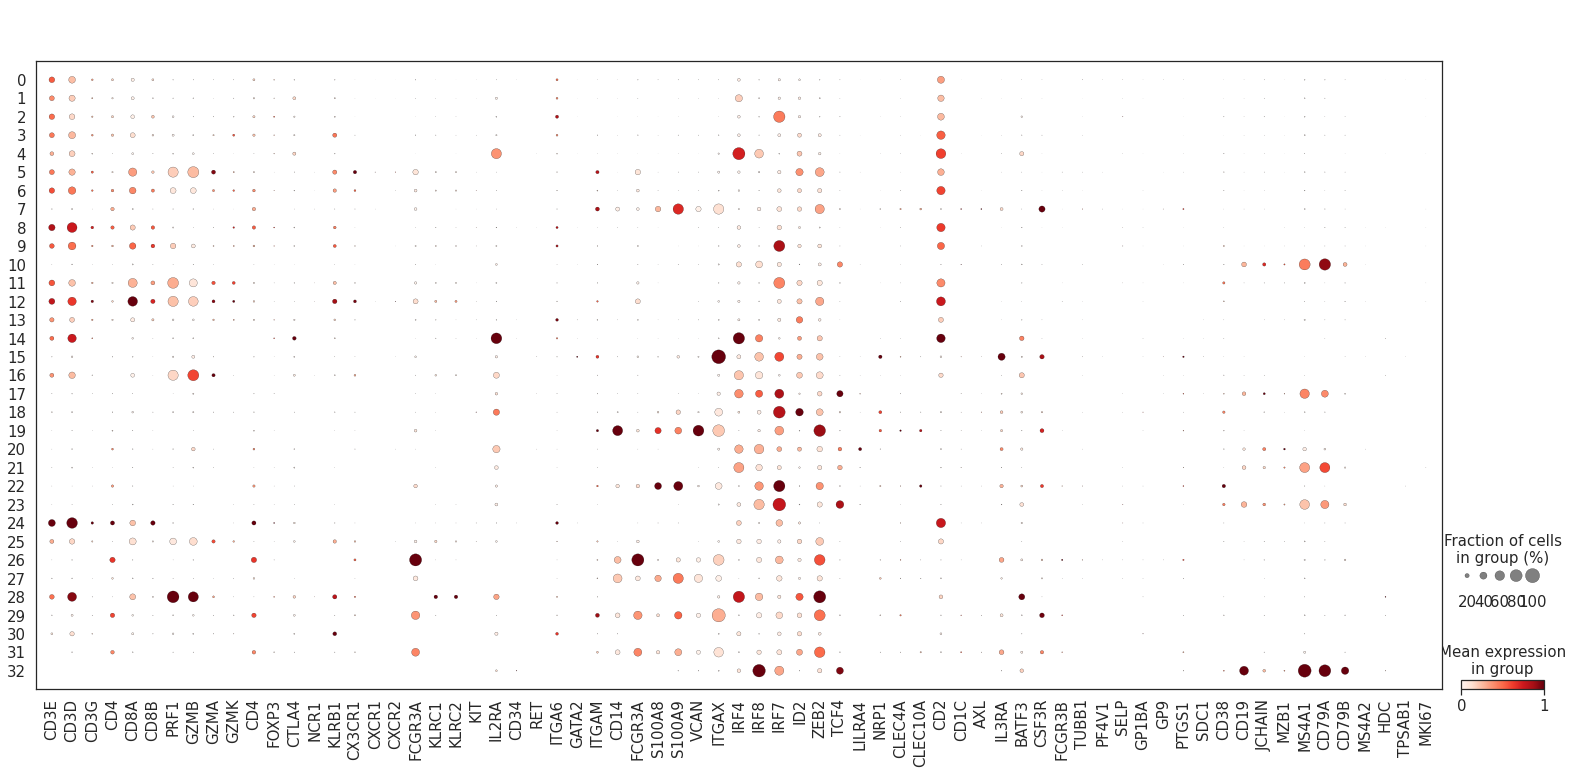

In [109]:
#dotplot
%matplotlib inline
sns.set(font_scale = 1.5)
sns.set_style('white')
#marker_genes_select =['NCR1','NCAM1','KLRB1','CXCR1',
#                     'CXCR2','CX3CR1','FCGR3A','CD3E','CD3D','CD3G','TRAC','TRBC1','TRBC2','TRDC','TRGC1','TRGC2','KLRC1', 'KLRC2',
#                     'CCR7','KIT','IL2RA','EPCAM','CDH1','CD19','CD68','SDC1','CD4','CD8A','CD8B','MKI67','BCL6','IL6ST','']
marker_genes_select = ['CD3E','CD3D','CD3G','TRAC','TRBC1','TRBC2','TRGC1','TRGC2','TRDC','CD4','CD8A','CD8B','PRF1','GZMB','GZMA','GZMK',
                       'CD4','FOXP3','CTLA4','IL2RA'
                      'CD56','NCR1','KLRB1','CX3CR1','CXCR1','CXCR2','FCGR3A','KLRC1','KLRC2','KIT','IL2RA',
                       'CD34','RET','THY1','ITGA6','EPCR','GATA2',
                       'ITGAM','CD14','FCGR3A','S100A8','S100A9','VCAN','ITGAX','IRF4','IRF8','IRF7','XCR1','ID2','ZEB2',
                       'TCF4','LILRA4','NRP1','CLEC4A','CLEC10A','CD2','CD1C','AXL','IL3RA','BATF3',
                       'CSF3R','FCGR3B',
                        'TUBB1', 'PF4V1', 'SELP', 'GP1BA', 'GP9', 'PTGS1',
                          'SDC1','CD38','CD19','JCHAIN','MZB1','MS4A1','CD79A','CD79B','IGHG1','IGHG2','IGHG3','IGHG4','IGHD','IGHM',
                        'MS4A2','HDC','TPSAB1','TPSAB2','TPSD',
                       'MKI67'
                      ]
marker_genes_select_filt = [x for x in marker_genes_select if x in adata.var_names]
sc.pl.dotplot(adata, marker_genes_select_filt, groupby=pheno_heat, dendrogram=False, standard_scale='var',)#layer='imputed')

In [92]:
np.mean(np.sum(adata.raw.X.todense(),axis=1))

3425.8928

In [93]:
adata

AnnData object with n_obs × n_vars = 23754 × 19222
    obs: 'nCount_RNA', 'nFeature_RNA', 'Condition', 'StimType', 'Donor', 'pheno_k10', 'pheno_k20', 'pheno_k30', 'pheno_k40', 'pheno_k50', 'pheno_k60', 'pheno_k70', 'pheno_k80', 'pheno_k90', 'pheno_k100', 'pheno_var_k10', 'pheno_var_k20', 'pheno_var_k30', 'pheno_var_k40', 'pheno_var_k50', 'pheno_var_k60', 'pheno_var_k70', 'pheno_var_k80', 'pheno_var_k90', 'pheno_var_k100'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'tsne', 'umap', 'pheno_var_k10_colors', 'pheno_var_k20_colors', 'pheno_var_k30_colors', 'pheno_var_k40_colors', 'pheno_var_k50_colors', 'pheno_var_k60_colors', 'pheno_var_k70_colors', 'pheno_var_k80_colors', 'pheno_var_k90_colors', 'pheno_var_k100_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'imputed', 'raw'
    obsp: 'connectivities', 'distances'

In [86]:
np.sum(adata.uns['pca']['variance_ratio'])

0.25014192

In [7]:
level_1 = {0:'TNK',
          1:'TNK',
          2:'TNK',
          3:'TNK',
          4:'TNK',
          5:'TNK',
          6:'TNK',
          7:'M',
          8:'TNK',
          9:'TNK',
          10:'BP',
          11:'TNK',
          12:'TNK',
          13:'TNK',
          14:'TNK',
          15:'M',
          16:'TNK',
          17:'BP',
          18:'M',
          19:'M',
          20:'BP',
          21:'BP',
          22:'M',
          23:'BP',
          24:'TNK',
          25:'TNK',
          26:'M',
          27:'M',
          28:'TNK',
          29:'M',
          30:'TNK',
          31:'M',
          32:'BP'}

In [8]:
pheno_heat

'pheno_var_k40'

## rand index

In [56]:
#bootstrap 10000 cells from adata to avoid int overflow,if adata < 100 000 cells use all cells

if len(adata.obs_names) > 100000:
    adata_sample = adata[adata.obs.sample(n=100000, replace=False, random_state=1, axis=0).index,:]
else:
    adata_sample = adata

In [58]:
#if you get overflow error that means that the calculation intermediate results are too big to store into np.int64
#this messes up the entire calculatation so you have to downsample the cells
from sklearn.metrics import adjusted_rand_score
rand_indices = pd.DataFrame(index=pheno_names, columns=pheno_names)

for i in pheno_names:
    for j in pheno_names:
        a = np.int64(np.array(adata_sample.obs[i]))
        b = np.int64(np.array(adata_sample.obs[j]))
        c = adjusted_rand_score(a, b)
        rand_indices.loc[i,j] = c

In [59]:
rand_indices

pheno_var_k10 pheno_var_k20 pheno_var_k30 pheno_var_k40  \
pheno_var_k10            1.0      0.833253      0.746944      0.735437   
pheno_var_k20       0.833253           1.0      0.823346      0.819119   
pheno_var_k30       0.746944      0.823346           1.0      0.919107   
pheno_var_k40       0.735437      0.819119      0.919107           1.0   
pheno_var_k50       0.737786      0.778745      0.915015       0.89187   
pheno_var_k60       0.706148       0.75995      0.879271      0.872943   
pheno_var_k70       0.701723      0.755125      0.873367       0.86564   
pheno_var_k80       0.698831      0.754133      0.844812      0.871182   
pheno_var_k90       0.694761      0.746892      0.841201      0.872023   
pheno_var_k100       0.69417      0.745671      0.865372      0.853539   

               pheno_var_k50 pheno_var_k60 pheno_var_k70 pheno_var_k80  \
pheno_var_k10       0.737786      0.706148      0.701723      0.698831   
pheno_var_k20       0.778745       0.75995      0.755125      0.754133   
pheno_var_k30       0.915015      0.879271      0.873367      0.844812   
pheno_var_k40        0.89187      0.872943       0.86564      0.871182   
pheno_var_k50            1.0      0.913251      0.907349       0.87368   
pheno_var_k60       0.913251           1.0      0.977209      0.939321   
pheno_var_k70       0.907349      0.977209           1.0      0.953916   
pheno_var_k80        0.87368      0.939321      0.953916           1.0   
pheno_var_k90       0.875659      0.941993      0.948888      0.969576   
pheno_var_k100      0.900109      0.960956      0.970776      0.947079   

               pheno_var_k90 pheno_var_k100  
pheno_var_k10       0.694761        0.69417  
pheno_var_k20       0.746892       0.745671  
pheno_var_k30       0.841201       0.865372  
pheno_var_k40       0.872023       0.853539  
pheno_var_k50       0.875659       0.900109  
pheno_var_k60       0.941993       0.960956  
pheno_var_k70       0.948888       0.970776  
pheno_var_k80       0.969576       0.947079  
pheno_var_k90            1.0       0.954644  
pheno_var_k100      0.954644            1.0

<AxesSubplot:>

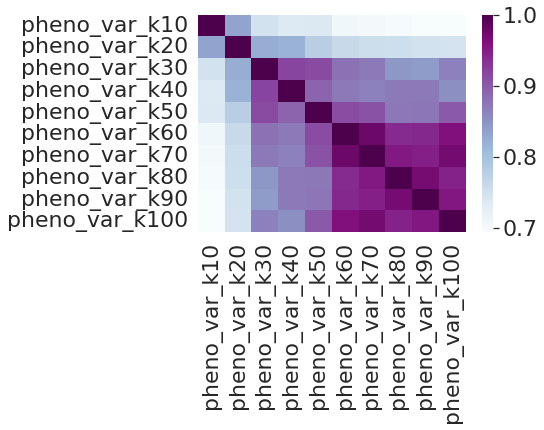

In [60]:
#plot rand indices
sns.heatmap(rand_indices.astype('float'),
                    cmap='BuPu',
                    cbar=True,
                    yticklabels=True,
                    xticklabels=True,
                  # vmax=1,
                   # center=0.5,
                    #vmin=0)
            )

# annotate

In [12]:
level_1 = {0:'TNK',
          1:'TNK',
          2:'TNK',
          3:'TNK',
          4:'TNK',
          5:'TNK',
          6:'TNK',
          7:'M',
          8:'TNK',
          9:'TNK',
          10:'BP',
          11:'TNK',
          12:'TNK',
          13:'TNK',
          14:'TNK',
          15:'M',
          16:'TNK',
          17:'BP',
          18:'M',
          19:'M',
          20:'BP',
          21:'BP',
          22:'M',
          23:'BP',
          24:'TNK',
          25:'TNK',
          26:'M',
          27:'M',
          28:'TNK',
          29:'M',
          30:'TNK',
          31:'M',
          32:'BP'}

In [13]:
adata.obs['annotation'] = adata.obs['pheno_var_k40'].map(level_1)
set(adata.obs['annotation'])

{'BP', 'M', 'TNK'}

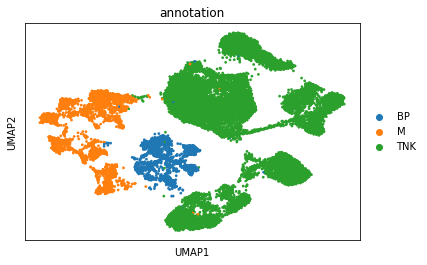

In [14]:
sc.pl.umap(adata, color = ['annotation'], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0,
           vmax=10000)

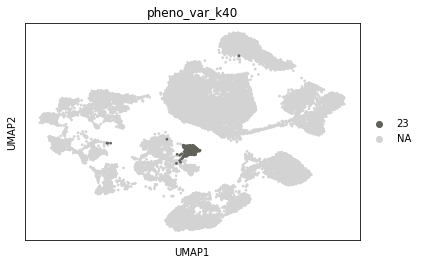

In [15]:
sc.pl.umap(adata, color = ['pheno_var_k40'],groups=[23], s = 30, cmap='viridis', layer='imputed', legend_fontsize = 10, vmin=0,
           vmax=10000)

In [16]:
adata

AnnData object with n_obs × n_vars = 23754 × 19222
    obs: 'nCount_RNA', 'nFeature_RNA', 'Condition', 'StimType', 'Donor', 'pheno_k10', 'pheno_k20', 'pheno_k30', 'pheno_k40', 'pheno_k50', 'pheno_k60', 'pheno_k70', 'pheno_k80', 'pheno_k90', 'pheno_k100', 'pheno_var_k10', 'pheno_var_k20', 'pheno_var_k30', 'pheno_var_k40', 'pheno_var_k50', 'pheno_var_k60', 'pheno_var_k70', 'pheno_var_k80', 'pheno_var_k90', 'pheno_var_k100', 'annotation'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'tsne', 'umap', 'annotation_colors', 'pheno_var_k40_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'imputed', 'raw'
    obsp: 'connectivities', 'distances'

In [ ]:
adata.write(adata_typing_save_path)
print('saved to:',adata_typing_save_path)

# prepare gene set dictionary for Spectra

In [26]:
import cytopus as cp

In [27]:
G = cp.kb.KnowledgeBase()

KnowledgeBase object containing 75 cell types and 201 cellular processes



In [35]:
#define cell types to retrieve gene sets for
celltype_of_interest = ['TNK',
 'BP',
 'M']
global_celltypes = ['all-cells','leukocyte']

celltype_of_interest = [conversion_dict[x] for x in celltype_of_interest]

#you can retrieve gene sets linked to the parents and children of the queried gene sets above
#you can define the query depth using a dictionary, for all cell types not defined in the dict the query depth of the 
#<parent_depth> parameter will be used (proceed equivalently for children using the <child_depth> and <child_depth_dict>
#parameters)

#query_depth_parent = {'NK':2,'Treg':None,'DC':None} #e.g. removing the query for parent gene sets for Treg here because this would add the
                                #T-helper polarization gene sets (TH1, TH2, TH22 etc)
#query_depth_child = {'CD4-T':None,'ILC':None}

#retrieve dictionary for Spectra
G.get_celltype_processes(celltype_of_interest,global_celltypes = global_celltypes,get_children=True,get_parents=True,)
                         #child_depth=1,parent_depth=1,#parent_depth_dict = query_depth_parent,
                        #child_depth_dict = query_depth_child)

cell types of interest share the following parents: ['leukocyte'] This may be desired.


In [42]:
G.celltype_process_dict['global']

{'all_pyrimidine_metabolism': ['UPP1',
  'UPB1',
  'DPYSL3',
  'AICDA',
  'TK1',
  'NT5C',
  'TK2',
  'CTPS1',
  'DPYS',
  'SLC28A3',
  'CDA',
  'SLC29A1',
  'DPYSL2',
  'ALDH6A1',
  'UCK2',
  'DPYD',
  'DUT',
  'UCK1',
  'CTPS2',
  'UPP2',
  'DCTD',
  'SLC28A1'],
 'all_ros_response': ['LAMTOR5',
  'SRXN1',
  'NDUFS2',
  'SELENOS',
  'GPX3',
  'GLRX',
  'FES',
  'GCLC',
  'ERCC2',
  'SBNO2',
  'NDUFB4',
  'IPCEF1',
  'PDLIM1',
  'PTPA',
  'GPX4',
  'MSRA',
  'GSR',
  'PRDX2',
  'TXNRD2',
  'CAT',
  'PRNP',
  'MGST1',
  'SOD1',
  'NQO1',
  'JUNB',
  'PRDX4',
  'PFKP',
  'PRDX6',
  'CDKN2D',
  'LSP1',
  'SCAF4',
  'TXN',
  'MPO',
  'GCLM',
  'TXNRD1',
  'OXSR1',
  'ABCC1',
  'EGLN2',
  'MBP',
  'STK25',
  'GLRX2',
  'HHEX',
  'SOD2',
  'FTL',
  'ATOX1',
  'G6PD',
  'HMOX2',
  'NDUFA6',
  'PRDX1'],
 'all_autophagic-cell-death': ['BNIP3',
  'LAPTM5',
  'TP53INP1',
  'PHB2',
  'SH3GLB1',
  'CDKN2D',
  'LAMP1',
  'TREM2',
  'ATG7',
  'CDKN1B',
  'CTSV'],
 'all_DNA-methylation': ['DNMT3B', 'D

In [45]:
#convert celltype labels back to celltypes in data
Spectra_dict = {}

for i,v in G.celltype_process_dict.items():
    Spectra_dict[conversion_dict_inv[i]] = v

In [49]:
#filter gene set annotation dict for genes contained in adata
annotations = check_gene_set_dictionary(adata, Spectra_dict, obs_key='annotation',global_key='global')

Cell type labels in gene set annotation dictionary and AnnData object are identical
Your gene set annotation dictionary is correctly formatted.


In [60]:
annotations.keys()

dict_keys(['TNK', 'BP', 'M', 'global'])

In [61]:
annotations['TNK'].keys()

dict_keys(['TNK_cytotoxicity-effectors', 'TNK_IL2-STAT5-signaling', 'TNK_IL2_response', 'TNK_PD-1_signaling', 'T_IL4_response', 'T_IL21_response', 'T_tcr-activation', 'NK_IL15_response', 'CD4-T_TH2_UP', 'CD4-T_TH17_UP', 'CD4-T_TH1_UP', 'CD4-T_TFH_UP', 'CD4-T_IL4_response', 'CD4-T_TH22_UP', 'CD4-T_IL12_response', 'CD4-T_TH9_UP', 'CD8-T_tumor-reactive-like_UP', 'CD8-T_terminal-exhaustion', 'CD8-T_IL12_response', 'Treg_FoxP3-stabilization'])

In [62]:
annotations['M'].keys()

dict_keys(['M_IL17A_response', 'M_angiogenic-effectors', 'M_mac_CSF1_response', 'M_gran_CSF2_response', 'mast_granule-exocytosis', 'DC_CD40L_response', 'DC_antigen-crosspresentation', 'DC_LPS_response', 'Mac_LPS_response', 'Mac_CSF1_response', 'Mac_IL4-IL13_response', 'Mac_IFNG_response', 'p-DC_CpG-TLR9_response'])

In [64]:
annotations['BP'].keys()

dict_keys(['B_Breg_UP', 'B_effector-1_UP', 'B_CD40L_response', 'B_IL2_response', 'B_effector-2_UP', 'B_IgM-ligation_response'])

In [65]:
annotations['global'].keys()

dict_keys(['all_pyrimidine_metabolism', 'all_ros_response', 'all_autophagic-cell-death', 'all_DNA-methylation', 'all_eicosanoid_metabolism', 'all_MHC-I-presentation', 'all_bile-acid_synthesis', 'all_MHC-II-presentation', 'all_autophagy-selective', 'all_heparan-sulfate_degradation', 'all_galactose_metabolism', 'all_transmembrane-transport-lysosome', 'all_steroid_metabolism', 'all_mitophagy', 'all_complement_production', 'all_mitophagy_regulation_positive', 'all_autophagy-peroxisome', 'all_DNA-demethylation', 'all_coagulation-factor_production', 'all_GABA-shunt', 'all_selenoamino-acid_metabolism', 'all_pyruvate_metabolism', 'all_creatinine_metabolism', 'all_peroxisome-component', 'all_glyoxylate-dicarboxylate_metabolism', 'all_DNA-repair', 'all_oxidative-phosphorylation', 'all_n-glycan_degradation', 'all_PI3K-AKT-mTOR_signaling', 'all_glutathione_metabolism', 'all_chondroitine-sulfate_degradation', 'all_o-glycan_synthesis', 'all_glycogenesis', 'all_pyroptosis', 'all_CoA_synthesis', 'all_

In [ ]:
#store Spectra dictionary

import json
jpath = DATA_DIR+'Spectra_dict_PBMC_Kartha_230216.json'

with open(jpath, 'w') as f:
    json.dump(annotations,f)
print('saved data to:',jpath)

# filter ribo and mito genes before spectra run

In [24]:
adata_path = DATA_DIR + 'PBMC-X-NA-X-Kartha-X-scRNAseq-X-10.1016_j.xgen.2022.100166_normalized_clustered_10000hv_batch_annotated.h5ad'
adata_save_path = DATA_DIR + 'PBMC-X-NA-X-Kartha-X-scRNAseq-X-10.1016_j.xgen.2022.100166_normalized_clustered_10000hv_batch_annotated_noribo_nomito.h5ad'

In [25]:
adata = sc.read(adata_path)
adata

Only considering the two last: ['.100166_normalized_clustered_10000hv_batch_annotated', '.h5ad'].
Only considering the two last: ['.100166_normalized_clustered_10000hv_batch_annotated', '.h5ad'].


AnnData object with n_obs × n_vars = 23754 × 19222
    obs: 'nCount_RNA', 'nFeature_RNA', 'Condition', 'StimType', 'Donor', 'pheno_k10', 'pheno_k20', 'pheno_k30', 'pheno_k40', 'pheno_k50', 'pheno_k60', 'pheno_k70', 'pheno_k80', 'pheno_k90', 'pheno_k100', 'pheno_var_k10', 'pheno_var_k20', 'pheno_var_k30', 'pheno_var_k40', 'pheno_var_k50', 'pheno_var_k60', 'pheno_var_k70', 'pheno_var_k80', 'pheno_var_k90', 'pheno_var_k100', 'annotation'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'annotation_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'pheno_var_k40_colors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'imputed', 'raw'
    obsp: 'connectivities', 'distances'

In [26]:
### Calculate ribosomal and mito
malat1 = ["MALAT1"]
mito_genes = [gene for gene in adata.var.index if "MT-" == gene[0:3]]
mito_ribos = [gene for gene in adata.var.index if "MRPL" == gene[0:3]]
actn_genes = [gene for gene in adata.var.index if "ACTN" == gene[0:4]]
riboL_genes = [gene for gene in adata.var.index if "RPL" == gene[0:3]]
riboS_genes = [gene for gene in adata.var.index if "RPS" == gene[0:3]]
ribo = list(set(riboL_genes+riboS_genes))
ribosomal_genes_df = pd.read_csv("./RB_genes_human.txt", sep="r", header=None)
ribo = set(ribo+list(ribosomal_genes_df[0])) 
ribo = ribo & set(adata.var.index)
mito = mito_genes + mito_ribos

In [28]:
#remove mito ribo genes
print('adata shape before filtering:', adata.shape)
remove_genes = set(malat1 + mito + actn_genes +
                   list(ribo))
keep_genes = list(set(adata.var.index) - remove_genes)
keep_genes[:5]

adata = adata[:, keep_genes]
print('adata shape after filtering:', adata.shape)

adata shape before filtering: (23754, 19222)
adata shape after filtering: (23754, 19004)


In [ ]:
adata.write(adata_save_path)
print(adata_save_path)